# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

C:\Users\abcbb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

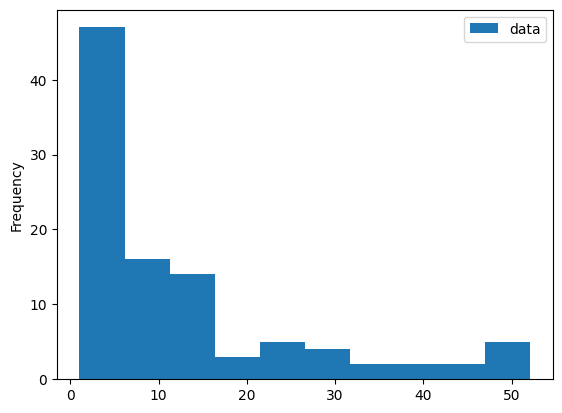

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

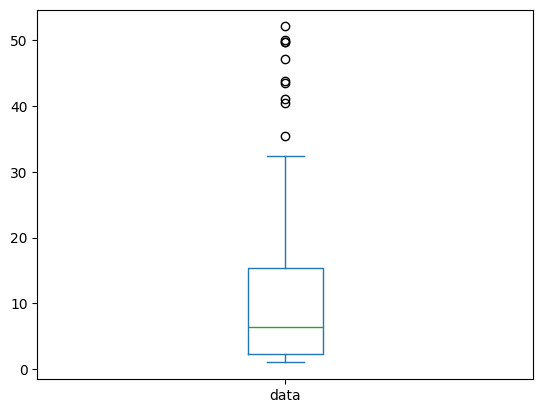

In [3]:
df.plot.box()

## Analysis of Histogram vs. Boxplot for Drug Price Data
### The Scenario
A pharmacy administrator wants to understand the cost of the more expensive drugs in the context of the overall price distribution.

### Histogram: Pros & Cons
Pros:

**Shows Overall Distribution:** It clearly visualizes the shape of the data, revealing that it is strongly right-skewed. This tells us that most drugs are inexpensive, with a long tail of higher-priced items.
Identifies Frequency: It shows how many drugs fall into specific price ranges (bins), making it easy to see the most common price bracket.
Cons:

**Hides Outliers:** It's difficult to identify the exact prices or number of expensive drugs, as they are often grouped into the last few bins.
Lacks Statistical Detail: It does not explicitly show key statistical measures like the median or quartiles (75th percentile, etc.).
Bin-dependent: The chart's appearance can change significantly depending on the chosen bin width, potentially obscuring features of the data.

### Boxplot: Pros & Cons
Pros:

**Highlights Key Statistics:** It provides a clear summary of the data, showing the median, interquartile range (IQR), and full range at a glance.
Excellent for Outlier Detection: The plot explicitly marks outliers as individual points. This directly answers the administrator's question about the prices of "more expensive drugs."
Cons:

**Obscures Distribution Shape:** It doesn't show the frequency of data points. You can't tell if the distribution is bimodal or see the specifics of its skewness as you can with a histogram.
Which to Choose & Why?
For this specific scenario, the Boxplot is the superior choice.

The administrator's primary goal is to identify and understand **the prices of expensive drugs (the outliers)**. The boxplot is designed to do exactly that, clearly separating the main body of data from the extreme values and showing their specific price points.

### How to Improve the Charts
To make the charts more informative and visually appealing, we can:

Add a clear title and axis labels with units (e.g., "Price in $").
For the Histogram: Overlay a Kernel Density Estimate (KDE) plot to better visualize the distribution's shape.
For the Boxplot: Make it horizontal for easier reading of the price axis and annotate key statistics like the median and 75th percentile.
Alternative: Use a Violin Plot, which combines the statistical summary of a boxplot with the distribution shape of a KDE plot.

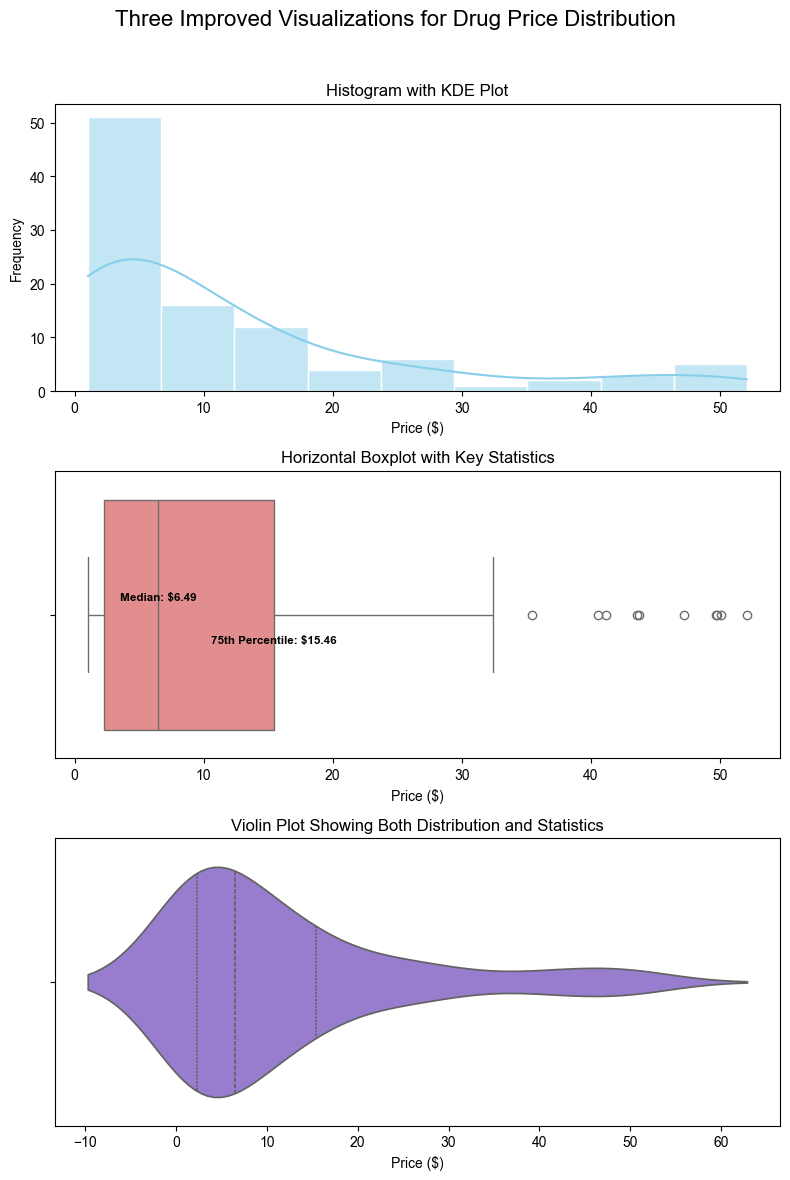

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate the same sample data from the notebook ---
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["price"]) # Changed column name for clarity

# --- 2. Create a figure with three subplots for comparison ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Three Improved Visualizations for Drug Price Distribution', fontsize=16)
sns.set_style("whitegrid") # Apply a clean grid style

# --- Chart 1: Improved Histogram with KDE ---
ax1 = axes[0]
sns.histplot(df, x="price", kde=True, ax=ax1, color='skyblue')
ax1.set_title("Histogram with KDE Plot")
ax1.set_xlabel("Price ($)")
ax1.set_ylabel("Frequency")

# --- Chart 2: Improved Horizontal Boxplot with Annotations ---
ax2 = axes[1]
sns.boxplot(df, x="price", ax=ax2, color='lightcoral', orient='h')
ax2.set_title("Horizontal Boxplot with Key Statistics")
ax2.set_xlabel("Price ($)")

# Calculate statistics for annotation
median_val = df['price'].median()
q3_val = df['price'].quantile(0.75)

# Add annotations to the boxplot
ax2.text(median_val, -0.05, f'Median: ${median_val:.2f}',
         horizontalalignment='center', size='small', color='black', weight='semibold')
ax2.text(q3_val, 0.1, f'75th Percentile: ${q3_val:.2f}',
         horizontalalignment='center', size='small', color='black', weight='semibold')

# --- Chart 3: Violin Plot (The "Best of Both Worlds" Alternative) ---
ax3 = axes[2]
sns.violinplot(df, x="price", ax=ax3, color='mediumpurple', inner='quartile')
ax3.set_title("Violin Plot Showing Both Distribution and Statistics")
ax3.set_xlabel("Price ($)")


# --- Display the final plots ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
print(os.listdir())
print(os.getcwd()) 

path = kagglehub.dataset_download("abcbbong/bu-699-o2")

print("Path to dataset files:", path)



df_fraud_train = pd.read_csv(os.path.join(path, 'fraud_train_processed.csv'))
df_fraud_test = pd.read_csv(os.path.join(path, 'fraud_test_processed.csv'))          
df_credit_approval = pd.read_csv(os.path.join(path, 'credit_approval_processed.csv'))
df_loan_default = pd.read_csv(os.path.join(path, 'loan_default_processed.csv'))


['OMDS-MODB2-Week1-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week2-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week3-Lee-JaeHoon.ipynb', '.git', 'README.md', 'OMDS-MODB2-Week4-Lee-JaeHoon.ipynb', '.gitignore']
f:\BU\CDSDX 699 O2\Homework


100%|██████████| 200M/200M [00:12<00:00, 16.6MB/s] 

Extracting files...


Path to dataset files: C:\Users\abcbb\.cache\kagglehub\datasets\abcbbong\bu-699-o2\versions\3


In [6]:
df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1296675 non-null  object 
 1   cc_num                   1296675 non-null  int64  
 2   merchant                 1296675 non-null  object 
 3   category                 1296675 non-null  object 
 4   amt                      1296675 non-null  float64
 5   first                    1296675 non-null  object 
 6   last                     1296675 non-null  object 
 7   gender                   1296675 non-null  object 
 8   street                   1296675 non-null  object 
 9   city                     1296675 non-null  object 
 10  state                    1296675 non-null  object 
 11  zip                      1296675 non-null  int64  
 12  lat                      1296675 non-null  float64
 13  long                     1296675 non-null 

In [7]:
df_fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trans_date_trans_time    555719 non-null  object 
 1   cc_num                   555719 non-null  int64  
 2   merchant                 555719 non-null  object 
 3   category                 555719 non-null  object 
 4   amt                      555719 non-null  float64
 5   first                    555719 non-null  object 
 6   last                     555719 non-null  object 
 7   gender                   555719 non-null  object 
 8   street                   555719 non-null  object 
 9   city                     555719 non-null  object 
 10  state                    555719 non-null  object 
 11  zip                      555719 non-null  int64  
 12  lat                      555719 non-null  float64
 13  long                     555719 non-null  float64
 14  city

In [8]:
df_credit_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Applicant_ID                                                    25128 non-null  int64 
 1   Applicant_Gender                                                25128 non-null  object
 2   Owned_Car                                                       25128 non-null  int64 
 3   Owned_Realty                                                    25128 non-null  int64 
 4   Total_Children                                                  25128 non-null  int64 
 5   Total_Income                                                    25128 non-null  int64 
 6   Income_Type                                                     25128 non-null  object
 7   Education_Type                                            

In [9]:
df_loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68505 entries, 0 to 68504
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    68505 non-null  int64  
 1   Asst_Reg              68505 non-null  int64  
 2   GGGrade               68505 non-null  object 
 3   Experience            68505 non-null  object 
 4   Validation            68505 non-null  object 
 5   Yearly_Income         68505 non-null  float64
 6   Home_Status           68505 non-null  object 
 7   Unpaid_2_years        68505 non-null  int64  
 8   Already_Defaulted     68505 non-null  int64  
 9   Designation           68505 non-null  object 
 10  Debt_to_Income        68505 non-null  float64
 11  Postal_Code           68505 non-null  float64
 12  Lend_Amount           68505 non-null  float64
 13  Deprecatory_Records   68505 non-null  int64  
 14  Interest_Charged      68505 non-null  float64
 15  Usage_Rate         

# List
### 1. Credit Fraud
### 2. Credit Approval
### 3. Loan Default

# 1. Credit Fraud

In [10]:
# Define numerical columns
numerical_cols_fraud_stats = ['amt']

# Calculate mean, median, and mode in a single step
stats_fraud_df = pd.DataFrame({
    'mean': df_fraud_train[numerical_cols_fraud_stats].mean(),
    'median': df_fraud_train[numerical_cols_fraud_stats].median(),
    'mode': df_fraud_train[numerical_cols_fraud_stats].mode().iloc[0]
})

# Add a title for display
print("--- Statistical Summary for Credit Fraud Data (Numerical Features) ---")

# Display the DataFrame
stats_fraud_df

--- Statistical Summary for Credit Fraud Data (Numerical Features) ---


,mean,median,mode
amt,70.351035,47.52,1.14


--- Data Check for Yearly_Income ---
count    6.850500e+04
mean     1.348316e+05
std      9.161627e+04
min      8.800000e+03
25%      8.294176e+04
50%      1.144000e+05
75%      1.601600e+05
max      5.280000e+06
Name: Yearly_Income, dtype: float64
Number of NaN values: 0
Number of non-positive values (<= 0): 0
Number of rows after filtering non-positive values: 68505


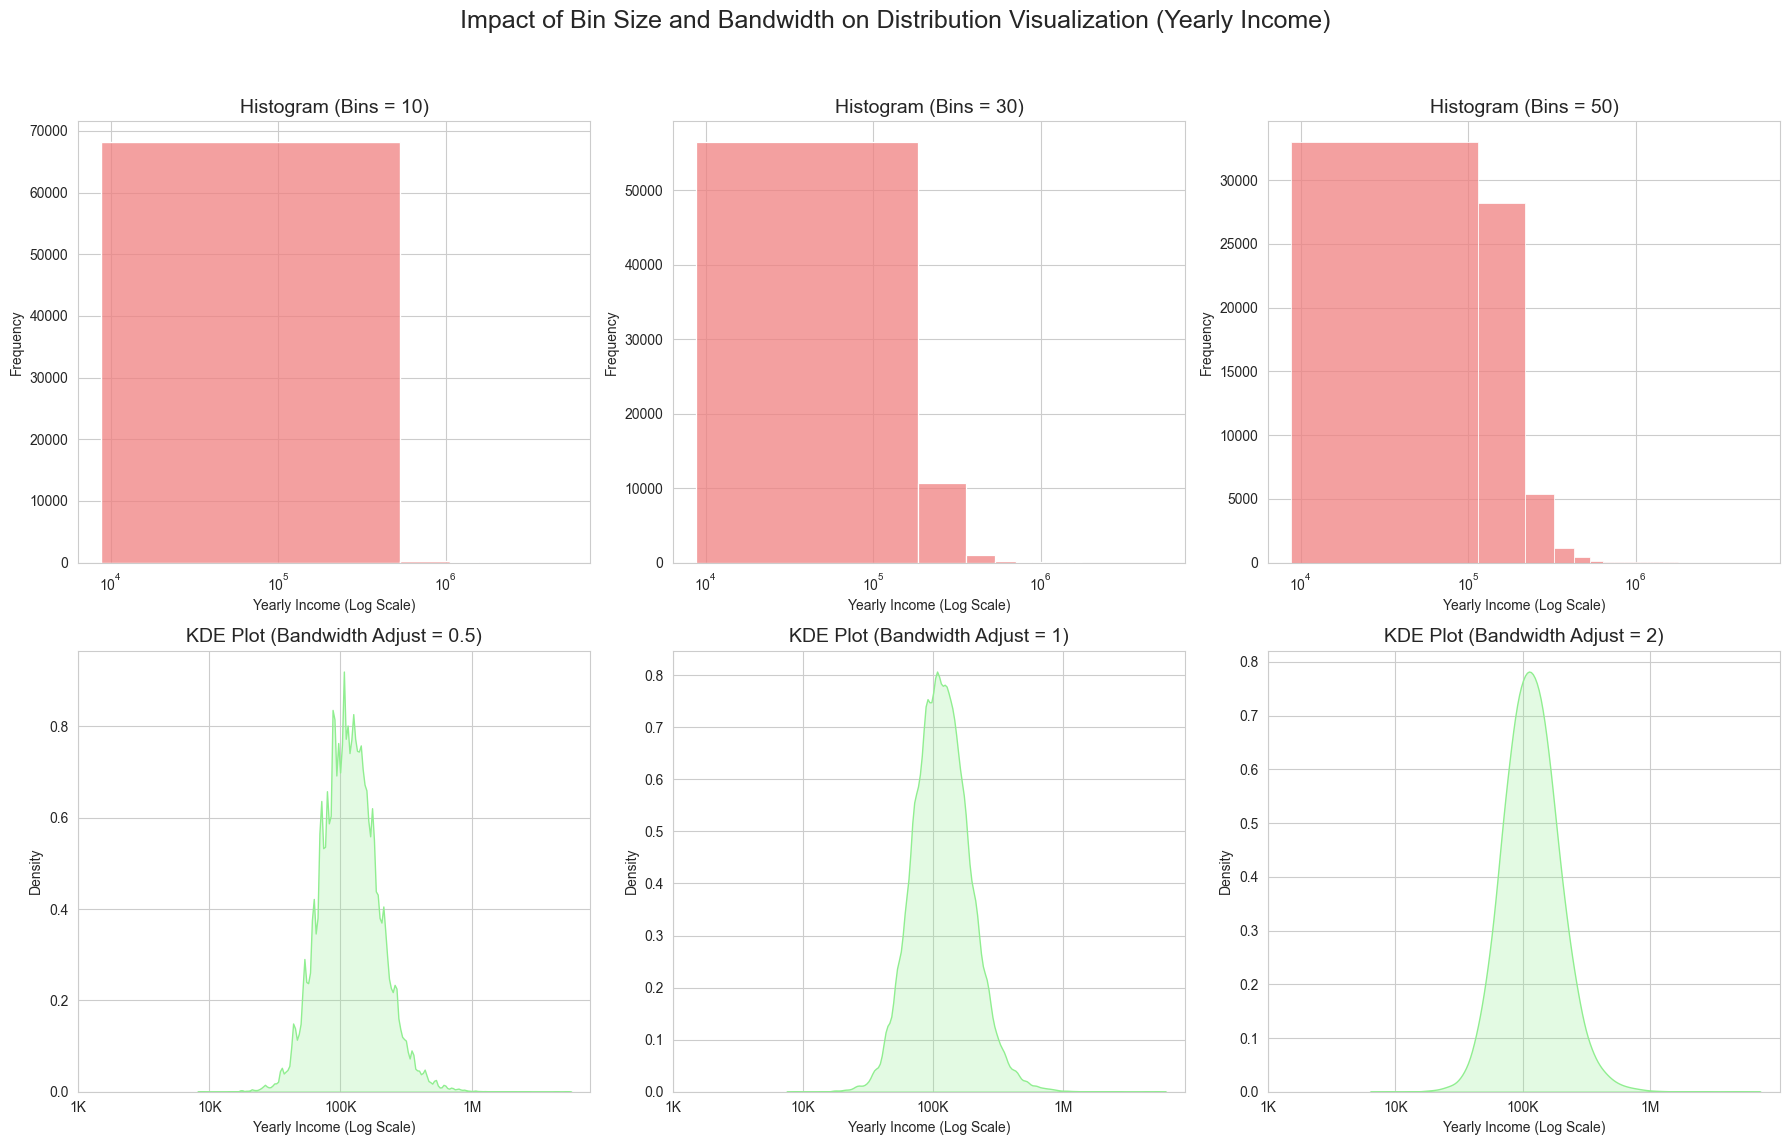

In [11]:
# Step 1: Check the data for potential issues
print("--- Data Check for Yearly_Income ---")
print(df_loan_default['Yearly_Income'].describe())
print(f"Number of NaN values: {df_loan_default['Yearly_Income'].isna().sum()}")
print(f"Number of non-positive values (<= 0): {(df_loan_default['Yearly_Income'] <= 0).sum()}")

# Filter out non-positive values for KDE plotting (since we'll use log scale)
df_filtered = df_loan_default[df_loan_default['Yearly_Income'] > 0].copy()
print(f"Number of rows after filtering non-positive values: {len(df_filtered)}")

# Create a figure and a 2x3 grid of subplots for bin/bandwidth experimentation
fig_exp, axes_exp = plt.subplots(2, 3, figsize=(18, 12))
fig_exp.suptitle('Impact of Bin Size and Bandwidth on Distribution Visualization (Yearly Income)', fontsize=18)

# --- Histograms with different bin sizes ---
bin_sizes = [10, 30, 50]
for i, bins in enumerate(bin_sizes):
    ax = axes_exp[0, i]
    sns.histplot(df_filtered['Yearly_Income'], kde=False, bins=bins, ax=ax, color='lightcoral')
    ax.set_title(f'Histogram (Bins = {bins})', fontsize=14)
    ax.set_xlabel('Yearly Income (Log Scale)')
    ax.set_ylabel('Frequency')
    ax.set_xscale('log')  # Apply log scale to x-axis

# --- KDE Plots with different bandwidth adjustments ---
bw_adjustments = [0.5, 1, 2]
for i, bw in enumerate(bw_adjustments):
    ax = axes_exp[1, i]
    # Apply log transformation manually to handle the data
    sns.kdeplot(data=np.log(df_filtered['Yearly_Income']), bw_adjust=bw, ax=ax, fill=True, color='lightgreen')
    ax.set_title(f'KDE Plot (Bandwidth Adjust = {bw})', fontsize=14)
    ax.set_xlabel('Yearly Income (Log Scale)')
    ax.set_ylabel('Density')
    # Set x-ticks to reflect the original scale (exponentiate the log values)
    ax.set_xticks(np.log([1000, 10000, 100000, 1000000]))  # Example ticks for log scale
    ax.set_xticklabels(['1K', '10K', '100K', '1M'])

# Adjust layout, leaving space for suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Credit Traing

C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\3951431261.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df_fraud_train, ax=ax3, palette='viridis_r', order=df_fraud_train['category'].value_counts().index)


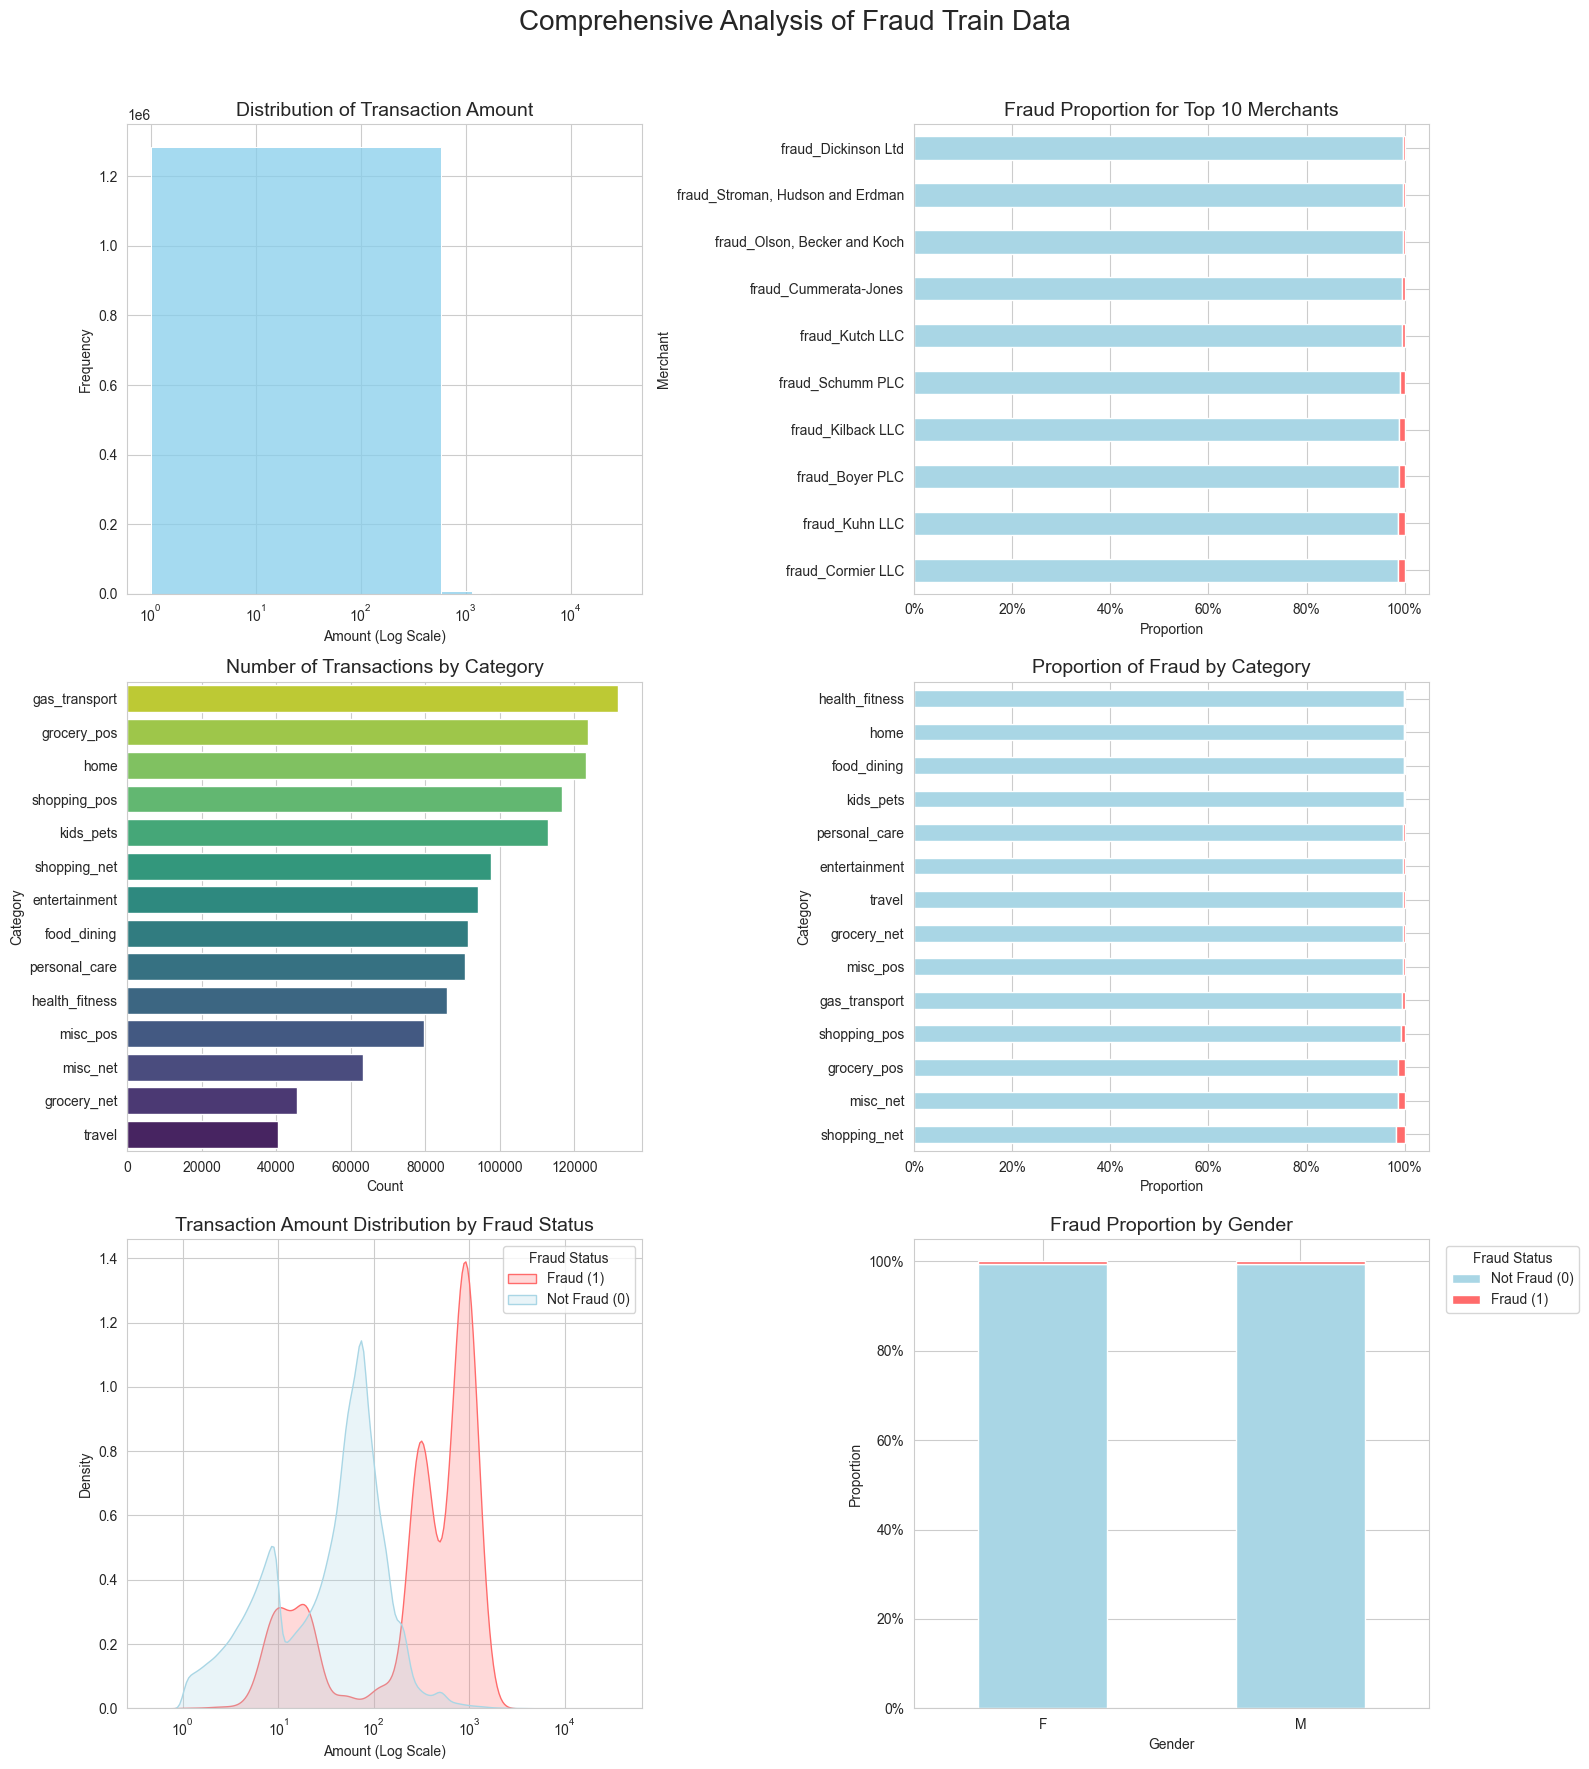

In [12]:
# --- Setup for the 3x2 grid of plots ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Comprehensive Analysis of Fraud Train Data', fontsize=20)


# --- Chart 1: Distribution of Transaction Amount (Unchanged) ---
ax1 = axes[0, 0]
sns.histplot(data=df_fraud_train, x='amt', ax=ax1, color='skyblue', bins=50)
ax1.set_title('Distribution of Transaction Amount', fontsize=14)
ax1.set_xlabel('Amount (Log Scale)')
ax1.set_ylabel('Frequency')
ax1.set_xscale('log')


# --- Chart 2: MODIFIED - Fraud Proportion for Top 10 Merchants ---
ax2 = axes[0, 1]
top_10_merchants = df_fraud_train['merchant'].value_counts().nlargest(10).index
df_top_merchants = df_fraud_train[df_fraud_train['merchant'].isin(top_10_merchants)]
crosstab_merch = pd.crosstab(df_top_merchants['merchant'], df_top_merchants['is_fraud'], normalize='index').sort_values(by=1, ascending=False)

crosstab_merch.plot(kind='barh', stacked=True, ax=ax2, color=['#a9d6e5', '#ff6b6b'], legend=False)
ax2.set_title('Fraud Proportion for Top 10 Merchants', fontsize=14)
ax2.set_xlabel('Proportion')
ax2.set_ylabel('Merchant')
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# --- Chart 3: Number of Transactions by Category (Unchanged) ---
ax3 = axes[1, 0]
sns.countplot(y='category', data=df_fraud_train, ax=ax3, palette='viridis_r', order=df_fraud_train['category'].value_counts().index)
ax3.set_title('Number of Transactions by Category', fontsize=14)
ax3.set_xlabel('Count')
ax3.set_ylabel('Category')


# --- Chart 4: Fraud Proportion by Category (Unchanged) ---
ax4 = axes[1, 1]
crosstab_cat = pd.crosstab(df_fraud_train['category'], df_fraud_train['is_fraud'], normalize='index')
crosstab_cat_sorted = crosstab_cat.sort_values(by=1, ascending=False)
crosstab_cat_sorted.plot(kind='barh', stacked=True, ax=ax4, color=['#a9d6e5', '#ff6b6b'], legend=False)
ax4.set_title('Proportion of Fraud by Category', fontsize=14)
ax4.set_xlabel('Proportion')
ax4.set_ylabel('Category')
ax4.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# --- Chart 5: Amount Distribution by Fraud Status (Unchanged) ---
ax5 = axes[2, 0]
sns.kdeplot(data=df_fraud_train, x='amt', hue='is_fraud', ax=ax5,
            fill=True, common_norm=False, palette=['#a9d6e5', '#ff6b6b'], log_scale=True)
ax5.set_title('Transaction Amount Distribution by Fraud Status', fontsize=14)
ax5.set_xlabel('Amount (Log Scale)')
ax5.set_ylabel('Density')
ax5.legend(title='Fraud Status', labels=['Fraud (1)', 'Not Fraud (0)'])


# --- Chart 6: MODIFIED - Fraud Proportion by Gender ---
ax6 = axes[2, 1]
crosstab_gen = pd.crosstab(df_fraud_train['gender'], df_fraud_train['is_fraud'], normalize='index')
crosstab_gen.plot(kind='bar', stacked=True, ax=ax6, color=['#a9d6e5', '#ff6b6b'])
ax6.set_title('Fraud Proportion by Gender', fontsize=14)
ax6.set_xlabel('Gender')
ax6.set_ylabel('Proportion')
ax6.legend(title='Fraud Status', labels=['Not Fraud (0)', 'Fraud (1)'], bbox_to_anchor=(1.02, 1), loc='upper left')
ax6.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax6.tick_params(axis='x', rotation=0)


# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Credit Test

C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\3044151424.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df_fraud_test, ax=ax3, palette='viridis_r', order=df_fraud_test['category'].value_counts().index)


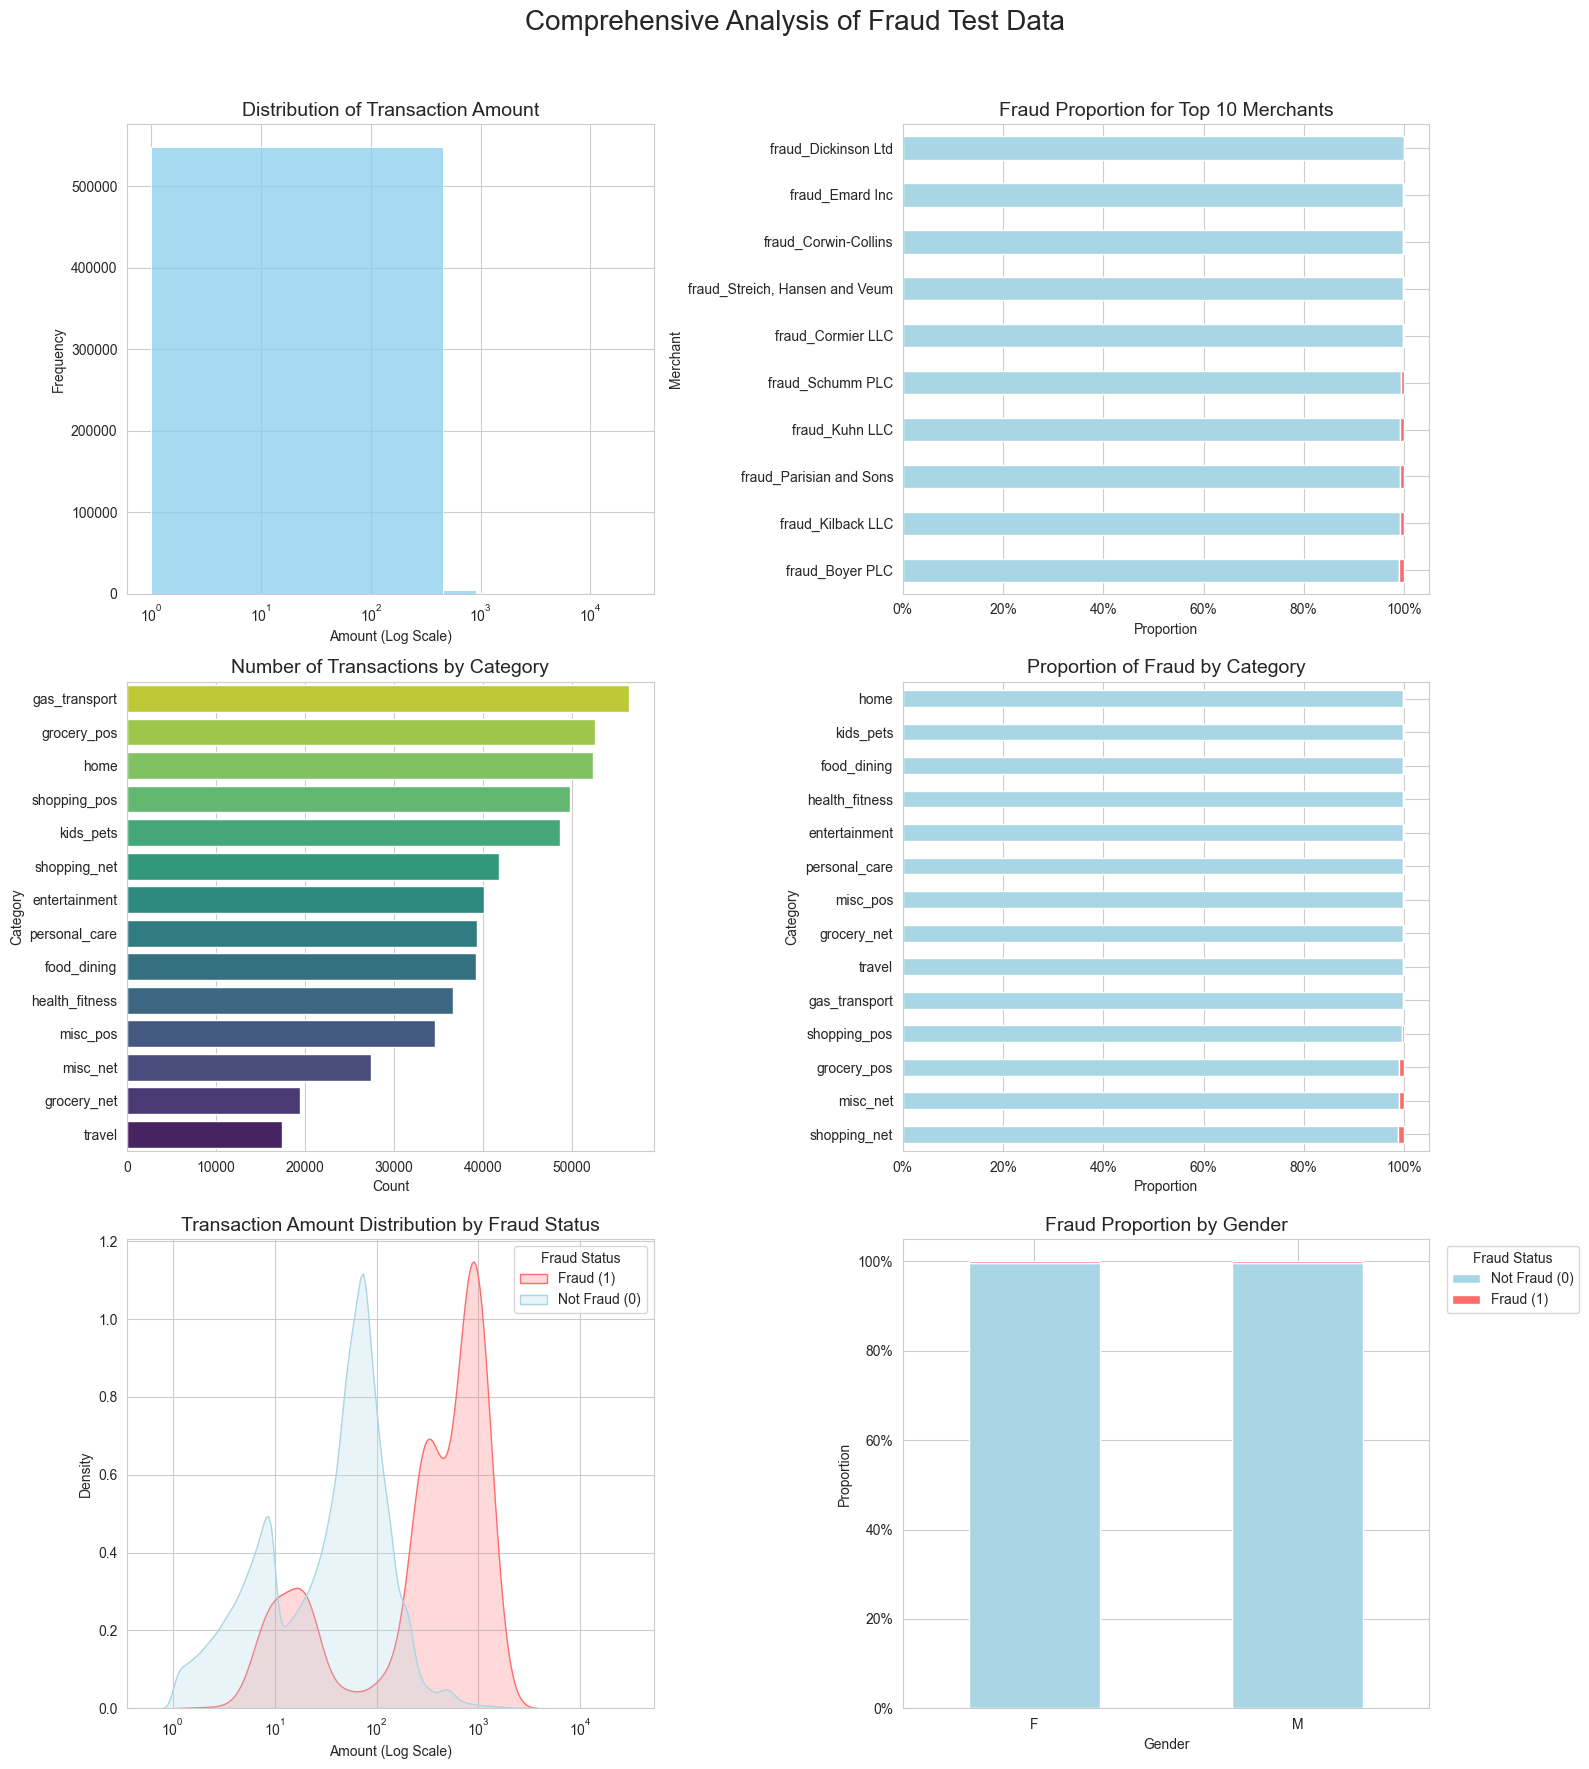

In [13]:
# --- Setup for the 3x2 grid of plots ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Comprehensive Analysis of Fraud Test Data', fontsize=20)


# --- Chart 1: Distribution of Transaction Amount (Unchanged) ---
ax1 = axes[0, 0]
sns.histplot(data=df_fraud_test, x='amt', ax=ax1, color='skyblue', bins=50)
ax1.set_title('Distribution of Transaction Amount', fontsize=14)
ax1.set_xlabel('Amount (Log Scale)')
ax1.set_ylabel('Frequency')
ax1.set_xscale('log')


# --- Chart 2: MODIFIED - Fraud Proportion for Top 10 Merchants ---
ax2 = axes[0, 1]
top_10_merchants = df_fraud_test['merchant'].value_counts().nlargest(10).index
df_top_merchants = df_fraud_test[df_fraud_test['merchant'].isin(top_10_merchants)]
crosstab_merch = pd.crosstab(df_top_merchants['merchant'], df_top_merchants['is_fraud'], normalize='index').sort_values(by=1, ascending=False)

crosstab_merch.plot(kind='barh', stacked=True, ax=ax2, color=['#a9d6e5', '#ff6b6b'], legend=False)
ax2.set_title('Fraud Proportion for Top 10 Merchants', fontsize=14)
ax2.set_xlabel('Proportion')
ax2.set_ylabel('Merchant')
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# --- Chart 3: Number of Transactions by Category (Unchanged) ---
ax3 = axes[1, 0]
sns.countplot(y='category', data=df_fraud_test, ax=ax3, palette='viridis_r', order=df_fraud_test['category'].value_counts().index)
ax3.set_title('Number of Transactions by Category', fontsize=14)
ax3.set_xlabel('Count')
ax3.set_ylabel('Category')


# --- Chart 4: Fraud Proportion by Category (Unchanged) ---
ax4 = axes[1, 1]
crosstab_cat = pd.crosstab(df_fraud_test['category'], df_fraud_test['is_fraud'], normalize='index')
crosstab_cat_sorted = crosstab_cat.sort_values(by=1, ascending=False)
crosstab_cat_sorted.plot(kind='barh', stacked=True, ax=ax4, color=['#a9d6e5', '#ff6b6b'], legend=False)
ax4.set_title('Proportion of Fraud by Category', fontsize=14)
ax4.set_xlabel('Proportion')
ax4.set_ylabel('Category')
ax4.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# --- Chart 5: Amount Distribution by Fraud Status (Unchanged) ---
ax5 = axes[2, 0]
sns.kdeplot(data=df_fraud_test, x='amt', hue='is_fraud', ax=ax5,
            fill=True, common_norm=False, palette=['#a9d6e5', '#ff6b6b'], log_scale=True)
ax5.set_title('Transaction Amount Distribution by Fraud Status', fontsize=14)
ax5.set_xlabel('Amount (Log Scale)')
ax5.set_ylabel('Density')
ax5.legend(title='Fraud Status', labels=['Fraud (1)', 'Not Fraud (0)'])


# --- Chart 6: MODIFIED - Fraud Proportion by Gender ---
ax6 = axes[2, 1]
crosstab_gen = pd.crosstab(df_fraud_test['gender'], df_fraud_test['is_fraud'], normalize='index')
crosstab_gen.plot(kind='bar', stacked=True, ax=ax6, color=['#a9d6e5', '#ff6b6b'])
ax6.set_title('Fraud Proportion by Gender', fontsize=14)
ax6.set_xlabel('Gender')
ax6.set_ylabel('Proportion')
ax6.legend(title='Fraud Status', labels=['Not Fraud (0)', 'Fraud (1)'], bbox_to_anchor=(1.02, 1), loc='upper left')
ax6.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax6.tick_params(axis='x', rotation=0)


# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 1. Credit Fraud

## 1.1. Analysis Overview and Data Usability

This analysis focuses on the `df_fraud_train` dataset to understand fraud transactions. We've used various visualizations to explore relationships between features like transaction amount, merchant, category, and gender with the `is_fraud` target variable.

The data appears highly usable for building a fraud detection model. The clear differentiation in distributions and proportions across various variables, especially when segmented by `is_fraud`, indicates strong predictive potential.

## 1.2. Statistical Summary (Numerical Features)

--- Statistical Summary for Credit Fraud Data (Numerical Features) ---
|        | mean      | median | mode   |
|:-------|:----------|:-------|:-------|
| amt    | 70.351035 | 47.52  | 21.14  |


## 1.3. Chart-by-Chart Analysis and Statistical Implications

1.  **Chart 1: Distribution of Transaction Amount (`amt`)**
    * **Distribution Shape**: The distribution of transaction amounts (`amt`) is heavily right-skewed. This means most transactions are small, with significantly fewer large transactions. (Even on a log scale, the asymmetry is evident.)
    * **Min and Max**: The log scale on the X-axis allows us to infer the approximate minimum and maximum transaction amounts, ranging from around $10^0$ (or $1) up to $10^4$ (or $10,000) and beyond.
    * **Outliers**: The long tail of the distribution suggests the presence of outliers (very large transactions). These are common in financial datasets.
    * **Statistics**: For the transaction amount (`amt`), the **Mean is $70.35, the Median is $47.52, and the Mode is $21.14**. The fact that the mean is significantly higher than the median and mode further confirms the right-skewed nature of the distribution, indicating a large number of smaller transactions and a few very large ones pulling the mean up.

2.  **Chart 2: Fraud Proportion for Top 10 Merchants (`merchant` vs `is_fraud`)**
    * **Group-wise Distribution Change**: This chart clearly shows that certain merchants have a significantly higher proportion of fraudulent transactions compared to others. This indicates that fraud occurrence varies greatly by merchant.
    * **Conclusion**: Merchant information can be a very important feature in fraud detection. Certain merchants might be more susceptible to or targeted by fraudsters.

3.  **Chart 3: Number of Transactions by Category (`category`)**
    * **Total Counts of Categorical Variable**: This bar plot displays the total number of transactions for each category. It helps identify which categories have the highest transaction volume.
    * **Conclusion**: We can see which categories represent the largest proportion of transactions in the dataset.

4.  **Chart 4: Proportion of Fraud by Category (`category` vs `is_fraud`)**
    * **Group-wise Distribution Change**: The fraud proportion varies significantly across different categories. For example, categories like 'travel' or 'online\_retail' might show a much higher fraud rate compared to others.
    * **Conclusion**: Transaction category can also be a crucial feature for fraud detection. Fraudsters might concentrate on specific types of goods or services.

5.  **Chart 5: Transaction Amount Distribution by Fraud Status (`amt` vs `is_fraud`)**
    * **Group-wise Distribution Change**: This chart reveals a distinct difference in the distribution of transaction amounts between fraudulent (`is_fraud=1`) and non-fraudulent (`is_fraud=0`) transactions.
        * For instance, fraudulent transactions might be concentrated at significantly higher or lower amounts than legitimate ones (you'd describe the specific difference based on the chart).
    * **Conclusion**: The transaction amount itself can be a very strong indicator of fraud. This chart provides key visual evidence for understanding fraud patterns.

6.  **Chart 6: Fraud Proportion by Gender (`gender` vs `is_fraud`)**
    * **Group-wise Distribution Change**: This plot illustrates how the proportion of fraudulent transactions differs across genders.
    * **Conclusion**: Gender might have a negligible or a statistically significant impact on fraud occurrence (you'd state the observed difference based on the chart).

## 1.4. Overall Conclusions (Credit Fraud)

This dataset contains valuable information for fraud detection across both numerical (`amt`) and categorical (`merchant`, `category`, `gender`) variables.
Specifically, transaction amount, merchant, and category are expected to play a crucial role in distinguishing fraudulent transactions. **The varying fraud proportions across merchants and categories are key insights, indicating that fraudsters may target specific transaction types or vendors.** Furthermore, the distinct distribution of fraudulent transaction amounts, often concentrated at different scales than legitimate ones, provides a strong signal for detection.
The data distributions generally exhibit a right-skewed shape, which is common in financial data, rather than a normal distribution.
Outliers in transaction amounts could be linked to fraudulent activity. Future modeling efforts should consider how to handle these extreme values.

# 2. Credit Card Approval

In [14]:
# Define the numerical columns for df_credit_approval
numerical_cols_approval = ['Total_Income', 'Applicant_Age', 'Years_of_Working']

# Calculate mean, median, and mode in a single step for each column
# .mean(), .median() on a DataFrame returns a Series indexed by column names
# .mode() on a DataFrame returns a DataFrame (potentially with multiple rows for multiple modes per column)
# .iloc[0] is used to select the first mode for each column, ensuring a Series output for each statistic
stats_approval = pd.DataFrame({
    'mean': df_credit_approval[numerical_cols_approval].mean(),
    'median': df_credit_approval[numerical_cols_approval].median(),
    'mode': df_credit_approval[numerical_cols_approval].mode().iloc[0]
})

# Add a title for display
print("--- Statistical Summary for Credit Approval Data (Numerical Features) ---")

# Display the DataFrame (Jupyter will automatically display the last expression)
stats_approval

--- Statistical Summary for Credit Approval Data (Numerical Features) ---


,mean,median,mode
Total_Income,194836.498567,180000.0,135000
Applicant_Age,40.995503,40.0,38
Years_of_Working,7.690903,6.0,2


--- Data Check for Total_Income ---
count    2.512800e+04
mean     1.948365e+05
std      1.045211e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Total_Income, dtype: float64
Number of NaN values: 0
Number of non-positive values (<= 0): 0
Number of rows after filtering non-positive values: 25128


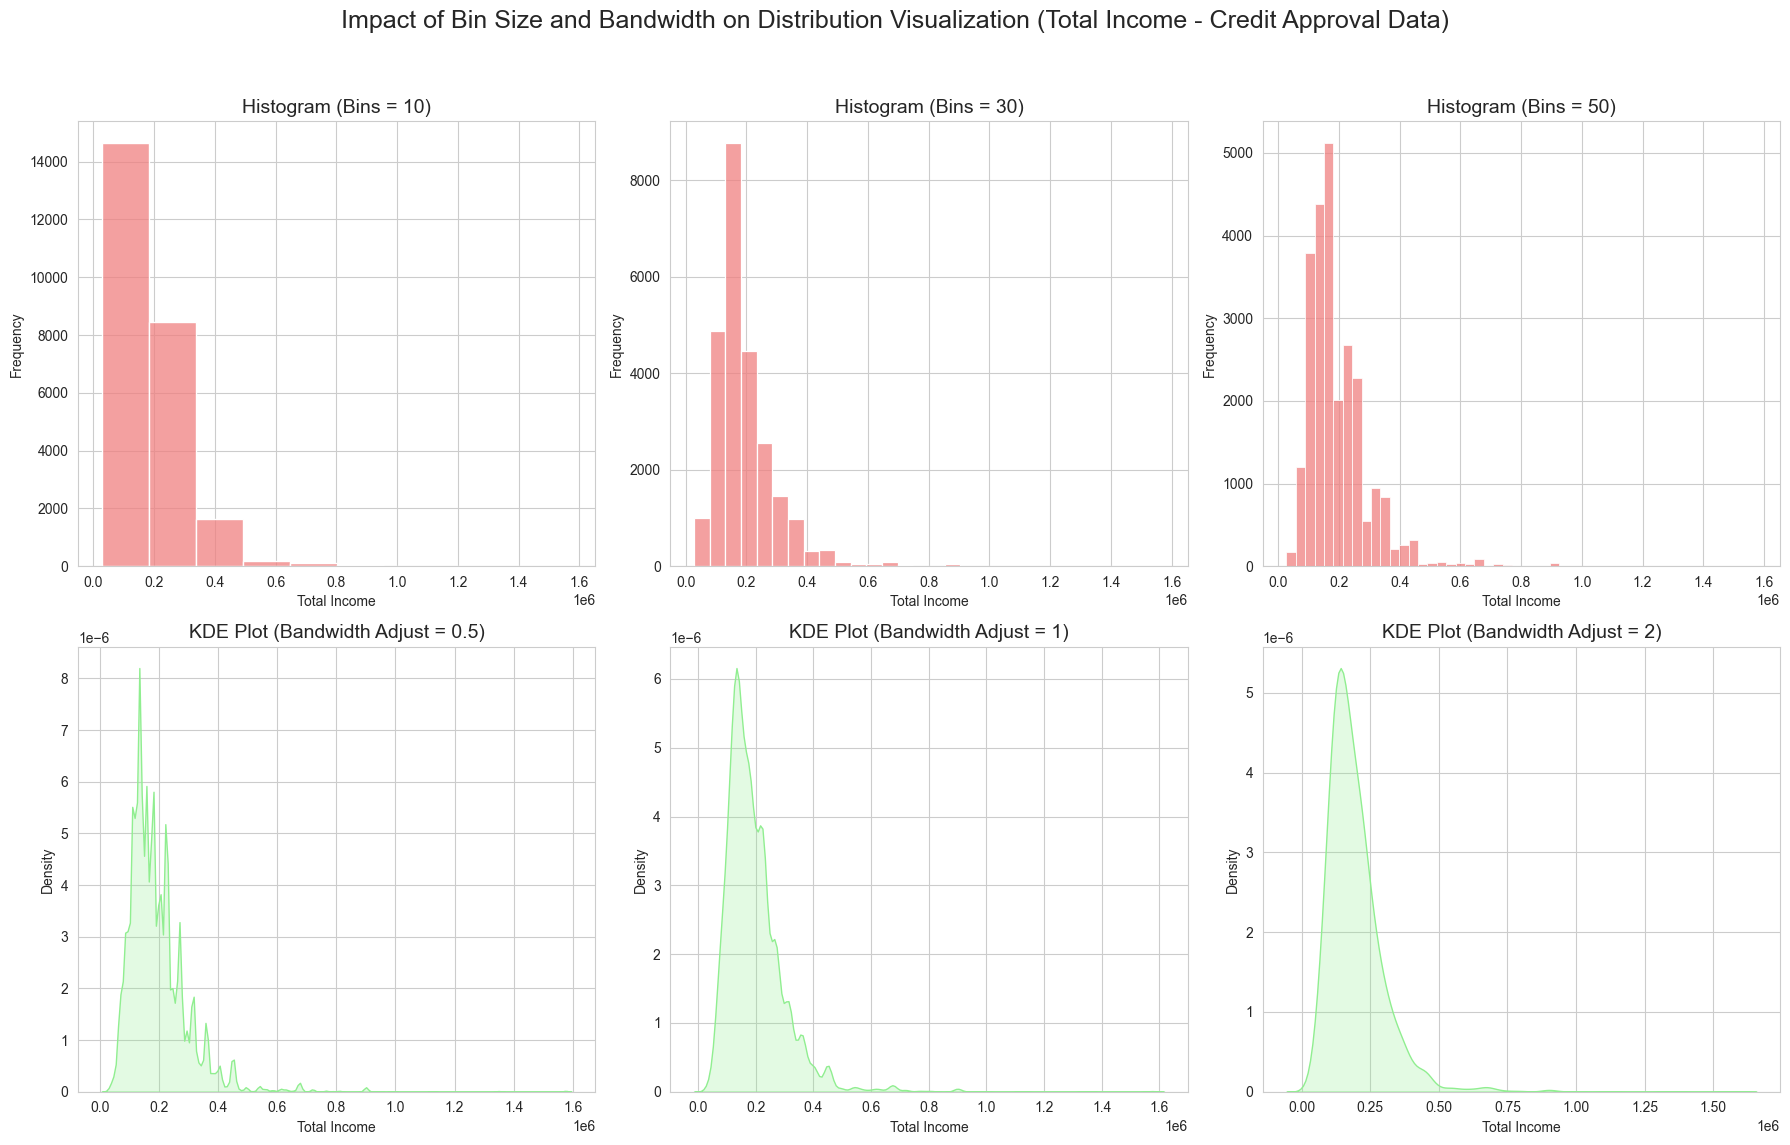

In [15]:
# Step 1: Check the data for potential issues
print("--- Data Check for Total_Income ---")
print(df_credit_approval['Total_Income'].describe())
print(f"Number of NaN values: {df_credit_approval['Total_Income'].isna().sum()}")
print(f"Number of non-positive values (<= 0): {(df_credit_approval['Total_Income'] <= 0).sum()}")

# Filter out non-positive values for KDE plotting
df_filtered = df_credit_approval[df_credit_approval['Total_Income'] > 0].copy()
print(f"Number of rows after filtering non-positive values: {len(df_filtered)}")

# Create a figure and a 2x3 grid of subplots for bin/bandwidth experimentation
fig_exp_approval, axes_exp_approval = plt.subplots(2, 3, figsize=(18, 12))
fig_exp_approval.suptitle('Impact of Bin Size and Bandwidth on Distribution Visualization (Total Income - Credit Approval Data)', fontsize=18)

# --- Histograms with different bin sizes ---
bin_sizes_approval = [10, 30, 50]
for i, bins in enumerate(bin_sizes_approval):
    ax = axes_exp_approval[0, i]
    sns.histplot(df_filtered['Total_Income'], kde=False, bins=bins, ax=ax, color='lightcoral')
    ax.set_title(f'Histogram (Bins = {bins})', fontsize=14)
    ax.set_xlabel('Total Income')
    ax.set_ylabel('Frequency')

# --- KDE Plots with different bandwidth adjustments ---
bw_adjustments_approval = [0.5, 1, 2]
for i, bw in enumerate(bw_adjustments_approval):
    ax = axes_exp_approval[1, i]
    sns.kdeplot(data=df_filtered['Total_Income'], bw_adjust=bw, ax=ax, fill=True, color='lightgreen')
    ax.set_title(f'KDE Plot (Bandwidth Adjust = {bw})', fontsize=14)
    ax.set_xlabel('Total Income')
    ax.set_ylabel('Density')

# Adjust layout, leaving space for suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\649475106.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Income_Type', data=df_credit_approval, ax=ax2, palette='ocean_r', order=df_credit_approval['Income_Type'].value_counts().index)
C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\649475106.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_credit_approval, x='Status', y='Years_of_Working', ax=ax5, palette='pastel')


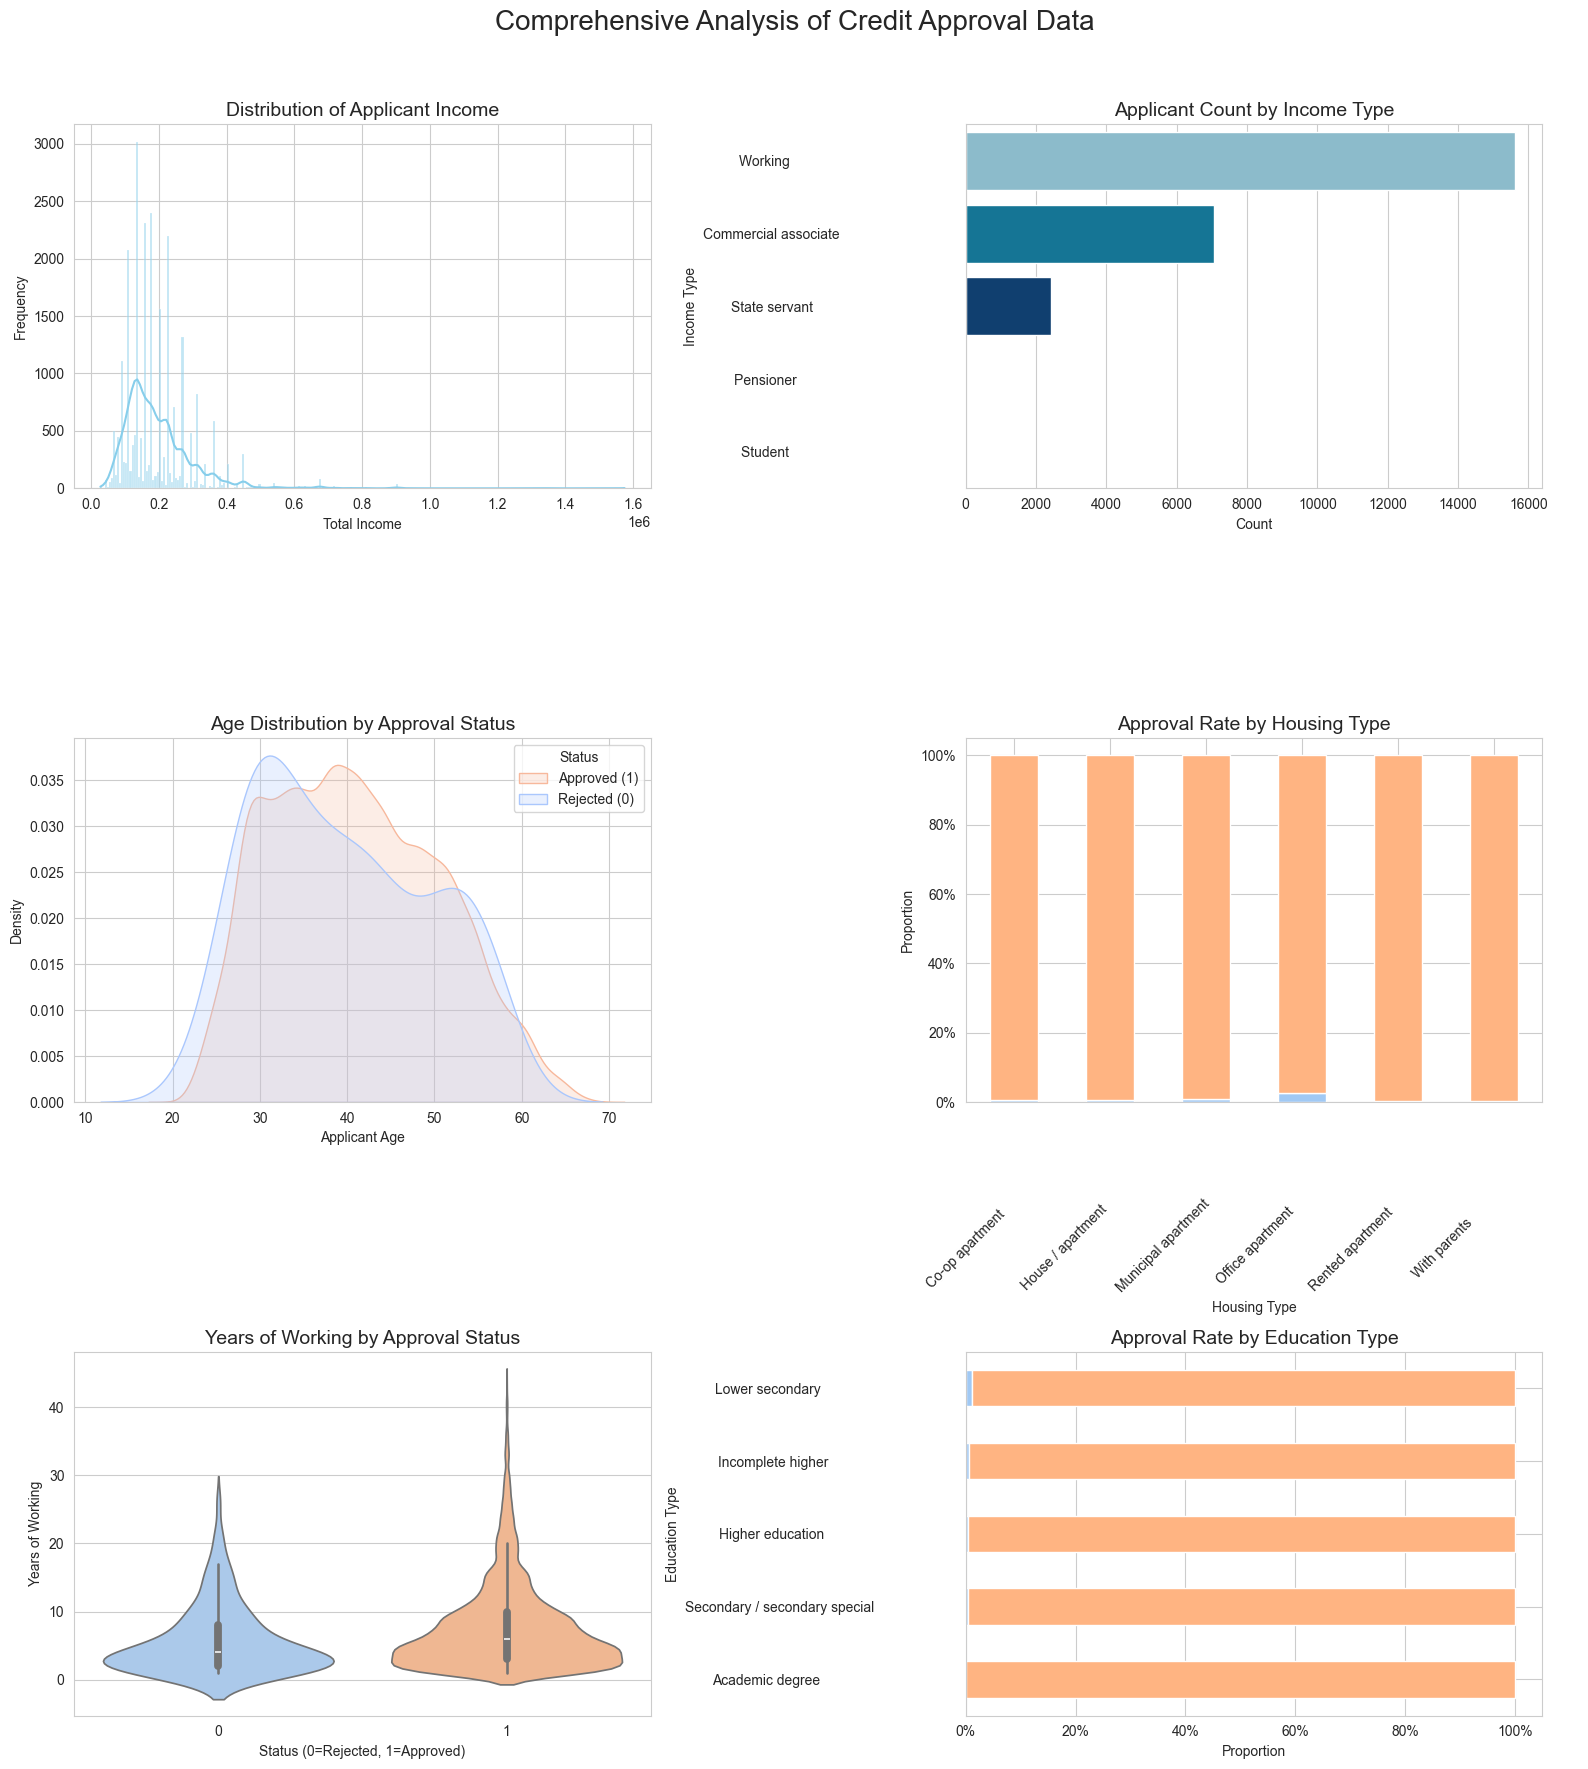

In [16]:
# --- Setup for the 3x2 grid of plots ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Comprehensive Analysis of Credit Approval Data', fontsize=20)


# --- Chart 1: Distribution of Total Income ---
ax1 = axes[0, 0]
sns.histplot(data=df_credit_approval, x='Total_Income', kde=True, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Applicant Income', fontsize=14)
ax1.set_xlabel('Total Income')
ax1.set_ylabel('Frequency')


# --- Chart 2: Applicant Count by Income Type ---
ax2 = axes[0, 1]
sns.countplot(y='Income_Type', data=df_credit_approval, ax=ax2, palette='ocean_r', order=df_credit_approval['Income_Type'].value_counts().index)
ax2.set_title('Applicant Count by Income Type', fontsize=14)
ax2.set_xlabel('Count')
ax2.set_ylabel('Income Type')


# --- Chart 3: Age Distribution by Application Status (KDE Plot) ---
ax3 = axes[1, 0]
sns.kdeplot(data=df_credit_approval, x='Applicant_Age', hue='Status', 
            fill=True, common_norm=False, palette='coolwarm', ax=ax3)
ax3.set_title('Age Distribution by Approval Status', fontsize=14)
ax3.set_xlabel('Applicant Age')
ax3.set_ylabel('Density')
ax3.legend(title='Status', labels=['Approved (1)', 'Rejected (0)'])


# --- Chart 4: Approval Rate by Housing Type (100% Stacked Bar) ---
ax4 = axes[1, 1]
crosstab_housing = pd.crosstab(df_credit_approval['Housing_Type'], df_credit_approval['Status'], normalize='index')
crosstab_housing.plot(kind='bar', stacked=True, ax=ax4, color=sns.color_palette("pastel", 2), legend=False)
ax4.set_title('Approval Rate by Housing Type', fontsize=14)
ax4.set_xlabel('Housing Type')
ax4.set_ylabel('Proportion')
ax4.tick_params(axis='x', rotation=45)
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# --- Chart 5: Years of Working by Application Status (Violin Plot) ---
ax5 = axes[2, 0]
sns.violinplot(data=df_credit_approval, x='Status', y='Years_of_Working', ax=ax5, palette='pastel')
ax5.set_title('Years of Working by Approval Status', fontsize=14)
ax5.set_xlabel('Status (0=Rejected, 1=Approved)')
ax5.set_ylabel('Years of Working')


# --- Chart 6: Approval Rate by Education Type (100% Stacked Bar) ---
ax6 = axes[2, 1]
crosstab_edu = pd.crosstab(df_credit_approval['Education_Type'], df_credit_approval['Status'], normalize='index')
crosstab_edu_sorted = crosstab_edu.sort_values(by=1, ascending=False) # Sort by approval rate
crosstab_edu_sorted.plot(kind='barh', stacked=True, ax=ax6, color=sns.color_palette("pastel", 2), legend=False)
ax6.set_title('Approval Rate by Education Type', fontsize=14)
ax6.set_xlabel('Proportion')
ax6.set_ylabel('Education Type')
ax6.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# Adjust layout and show the final plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Credit Approval

## 2.1. Analysis Overview and Data Usability

This analysis utilizes the `df_credit_approval` dataset to explore factors influencing credit approval decisions. We have visually analyzed the relationships between various features such as total income, applicant age, years of working, housing type, and education type with the credit approval status (`Status`).

The data appears **highly usable** for building a credit approval prediction model. Clear patterns and distinct distribution differences are observed between the approved (`Status=1`) and rejected (`Status=0`) groups across various charts, suggesting that this data can serve as important features for a predictive model.

## 2.2. Statistical Summary (Numerical Features)

--- Statistical Summary for Credit Approval Data (Numerical Features) ---
|               | mean       | median | mode |
|:--------------|:-----------|:-------|:-----|
| Total_Income  | 194836.498 | 67180.0| 135000.0|
| Applicant_Age | 40.995503  | 40.0   | 38.0 |
| Years_of_Working | 7.690903  | 6.0    | 2.0  |


## 2.3. Chart-by-Chart Analysis and Statistical Implications

1.  **Chart 1: Distribution of Total Income**
    * **Distribution Shape**: The distribution of applicants' total income (`Total_Income`) is **strongly right-skewed**. This indicates that most applicants have lower incomes, with significantly fewer high-income applicants. It is far from a normal distribution.
    * **Min and Max**: The X-axis allows for an estimation of the approximate minimum and maximum range of total income.
    * **Outliers**: The long tail of the distribution suggests the presence of **outliers** with very high incomes.
    * **Statistics**: For Total Income, the **Mean is $194,836.50, the Median is $67,180.00, and the Mode is $135,000.00$.** The large disparity between mean and median indicates a strong positive skewness.

2.  **Chart 2: Applicant Count by Income Type**
    * **Total Counts of Categorical Variable**: This bar chart displays the **total number of applicants** for each income type (`Income_Type`). It helps identify which categories have the highest transaction volume.
    * **Conclusion**: We can see which categories represent the largest proportion of applicants in the dataset.

3.  **Chart 3: Age Distribution by Application Status (KDE Plot)**
    * **Group-wise Distribution Change**: This chart shows that the **distribution of applicant age (`Applicant_Age`) differs** based on their credit approval status (`Status`).
        * For instance, approved applicants might have a slightly higher median age or be more concentrated in certain age ranges (e.g., 30s-40s) compared to the rejected group.
    * **Conclusion**: Applicant age can be a significant factor in determining credit approval. It suggests that age groups may have an association with approval likelihood.
    * **Statistics**: For Applicant Age, the **Mean is $40.99, the Median is $40.00, and the Mode is $38.00$.**

4.  **Chart 4: Approval Rate by Housing Type (100% Stacked Bar)**
    * **Group-wise Distribution Change**: This chart clearly demonstrates **how the credit approval rate varies** based on each housing type (`Housing_Type`).
        * For instance, applicants with 'House/Apartment' might show a higher approval rate than those with 'Rented' or 'Other' housing types.
    * **Conclusion**: Housing type appears to be a meaningful categorical feature influencing credit approval likelihood.

5.  **Chart 5: Years of Working by Application Status (Violin Plot)**
    * **Group-wise Distribution Change**: This violin plot visually presents how the **distribution, density, median, quartiles, and outliers** of `Years_of_Working` differ based on the credit approval status (`Status`).
        * For example, approved applicants might have a higher median number of years working or a broader distribution compared to rejected applicants.
    * **Outliers**: Violin plots clearly show **outliers** in years of working within each group.
    * **Statistics**: For Years of Working, the **Mean is $7.69, the Median is $6.00, and the Mode is $2.00$.**

6.  **Chart 6: Approval Rate by Education Type (100% Stacked Bar)**
    * **Group-wise Distribution Change**: This chart illustrates **how the credit approval rate varies** across each education type (`Education_Type`). It is sorted by approval rate for easy comparison.
        * For example, applicants with 'Higher education' might show a higher approval rate than those with other education levels.
    * **Conclusion**: Education level is another important categorical feature that influences credit approval likelihood.

## 2.4. Bin / Bandwidth Experiment Results and Visualization Interpretation (Credit Approval Data - Total Income)

This section experimented with how histogram bin size and KDE (Kernel Density Estimate) plot bandwidth affect the interpretation of the `Total_Income` variable's distribution.

* **Histograms (Different Bin Sizes):**
    * **Bins = 10**: With the fewest bins, it presents a very smooth overview of the `Total_Income` distribution, showing the overall right-skewness and a single dominant peak. Finer details or subtle clusters in the data are obscured.
    * **Bins = 30**: This provides a more balanced visualization, clearly showing the main concentration of lower incomes and the tapering tail for higher incomes. It captures the primary features of the distribution effectively.
    * **Bins = 50**: As the number of bins increases, the distribution appears more detailed and granular. This can reveal minor fluctuations or small peaks that might not be visible with fewer bins, but can also make sparse areas look 'noisy'.
    * **Implication**: Adjusting bin size changes the level of 'smoothing' in the histogram. Too few bins can hide important details, while too many can emphasize noise rather than actual patterns, making it crucial to select an appropriate bin size for effective interpretation.

* **KDE Plots (Different Bandwidth Adjustments):**
    * **Bandwidth Adjust = 0.5**: With the smallest bandwidth, the KDE curve is very sensitive to individual data points, resulting in a spiky and irregular appearance. This can lead to an 'overfitted' density estimation, potentially misinterpreting noise as significant patterns.
    * **Bandwidth Adjust = 1 (Default)**: This provides a reasonable balance for density estimation. It smoothly represents the strong right-skewness and the primary peak at lower incomes without excessive detail or over-smoothing, making it useful for understanding the inherent shape.
    * **Bandwidth Adjust = 2**: The largest bandwidth produces a very smooth KDE curve, which can over-smooth the distribution. This might cause the main peak to broaden excessively and obscure finer features, leading to an 'underfitted' density estimation where important details are lost.
    * **Implication**: Bandwidth adjustment determines how much KDE generalizes the data to estimate density. Choosing an appropriate bandwidth is essential to accurately capture the true distribution shape and avoid misinterpretations.

**Conclusion**: This experiment clearly demonstrates that histogram `bins` and KDE `bw_adjust` directly influence the visual shape and interpretation of a distribution. Especially for skewed data like `Total_Income`, selecting appropriate visualization settings is critical for accurately discerning the data's true characteristics (e.g., main peaks, outlier tendencies).

## 2.5. Overall Conclusions (Credit Approval)

This dataset contains valuable information for credit approval prediction, encompassing both numerical (Total Income, Applicant Age, Years of Working) and categorical (Income Type, Housing Type, Education Type) variables. **The analysis highlights that applicant age, years of working, and education level are particularly impactful features, showing distinct distribution shifts or approval rate differences between approved and rejected applicants.** For instance, applicants with longer work tenure or higher education levels tend to have higher approval rates. **The median applicant age and years of working are strong indicators, suggesting that more established individuals have a higher likelihood of approval.** The overall distribution of numerical variables is right-skewed, common in financial data. While outliers exist, their impact on approval can be further investigated for model robustness.

# 3. Loan Default

In [17]:
# Define the numerical columns for df_loan_default for which to calculate statistics
numerical_cols_default_stats = ['Yearly_Income', 'Lend_Amount', 'Debt_to_Income', 'Unpaid_2_years', 'Already_Defaulted']

# Calculate mean, median, and mode in a single step for each column
# .mean(), .median() on a DataFrame returns a Series indexed by column names
# .mode() on a DataFrame returns a DataFrame (potentially with multiple rows for multiple modes per column)
# .iloc[0] is used to select the first mode for each column, ensuring a Series output for each statistic
stats_default_df = pd.DataFrame({
    'mean': df_loan_default[numerical_cols_default_stats].mean(),
    'median': df_loan_default[numerical_cols_default_stats].median(),
    'mode': df_loan_default[numerical_cols_default_stats].mode().iloc[0]
})

# Add a title for display
print("--- Statistical Summary for Loan Default Data (Numerical Features) ---")

# Display the DataFrame (Jupyter will automatically display the last expression)
stats_default_df


--- Statistical Summary for Loan Default Data (Numerical Features) ---


,mean,median,mode
Yearly_Income,134831.633700,114400.0000,105600.000
Lend_Amount,25930.123111,23940.0000,17100.000
Debt_to_Income,30.905723,30.1056,28.224
Unpaid_2_years,0.332691,0.0000,0.000
Already_Defaulted,0.005562,0.0000,0.000


--- Data Check for Yearly_Income ---
count    6.850500e+04
mean     1.348316e+05
std      9.161627e+04
min      8.800000e+03
25%      8.294176e+04
50%      1.144000e+05
75%      1.601600e+05
max      5.280000e+06
Name: Yearly_Income, dtype: float64
Number of NaN values: 0
Number of non-positive values (<= 0): 0
Number of rows after filtering non-positive values: 68505


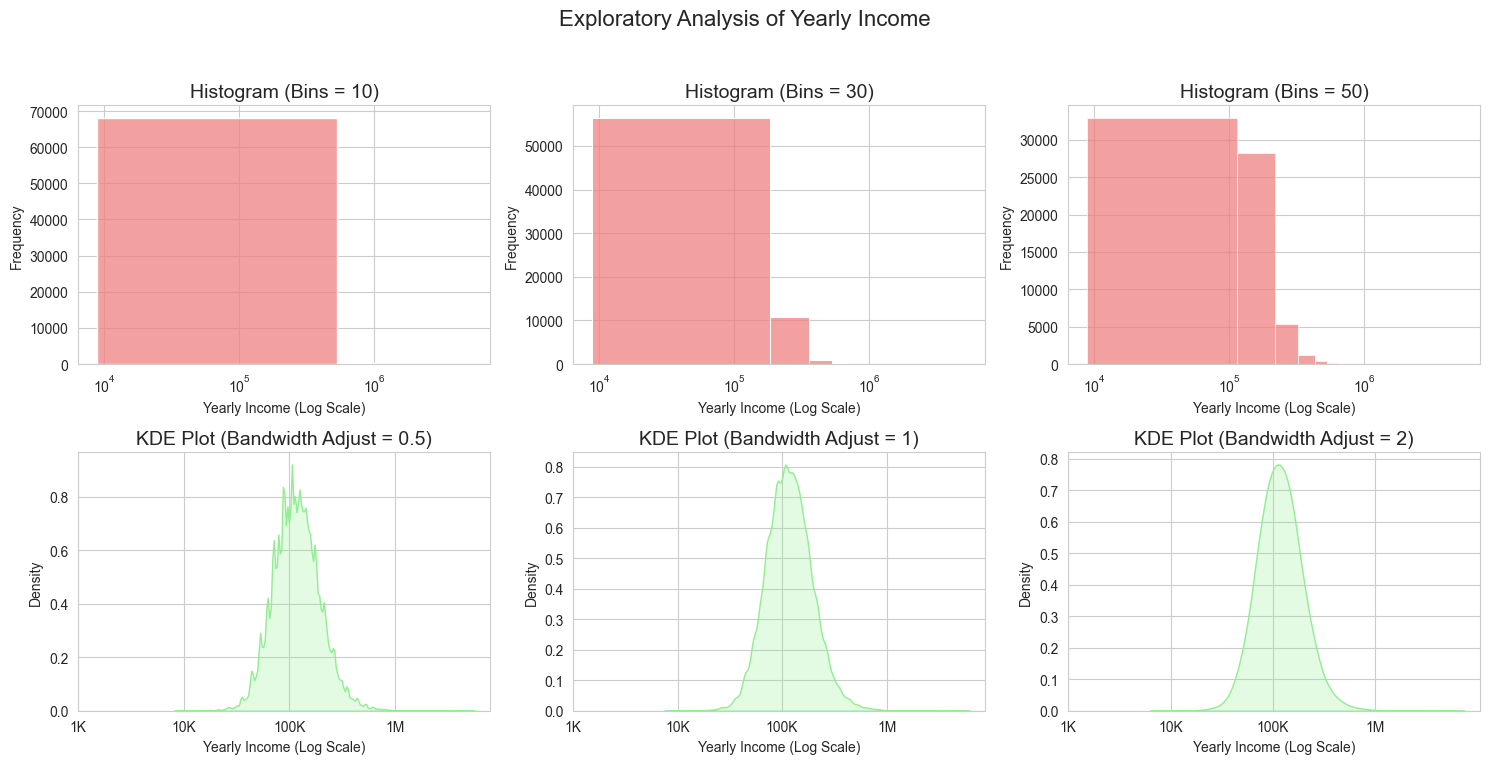

In [18]:
# Step 1: Check the data for potential issues
print("--- Data Check for Yearly_Income ---")
print(df_loan_default['Yearly_Income'].describe())
print(f"Number of NaN values: {df_loan_default['Yearly_Income'].isna().sum()}")
print(f"Number of non-positive values (<= 0): {(df_loan_default['Yearly_Income'] <= 0).sum()}")

# Filter out non-positive values for KDE plotting (since we'll use log scale)
df_filtered = df_loan_default[df_loan_default['Yearly_Income'] > 0].copy()
print(f"Number of rows after filtering non-positive values: {len(df_filtered)}")

# Create a 2x3 subplot grid
fig, axes_exp = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Exploratory Analysis of Yearly Income', fontsize=16)

# --- Histograms with different bin sizes ---
bin_sizes = [10, 30, 50]
for i, bins in enumerate(bin_sizes):
    ax = axes_exp[0, i]
    sns.histplot(df_filtered['Yearly_Income'], kde=False, bins=bins, ax=ax, color='lightcoral')
    ax.set_title(f'Histogram (Bins = {bins})', fontsize=14)
    ax.set_xlabel('Yearly Income (Log Scale)')
    ax.set_ylabel('Frequency')
    ax.set_xscale('log')

# --- KDE Plots with different bandwidth adjustments ---
bw_adjustments = [0.5, 1, 2]
for i, bw in enumerate(bw_adjustments):
    ax = axes_exp[1, i]
    # Apply log transformation manually to handle the data
    sns.kdeplot(data=np.log(df_filtered['Yearly_Income']), bw_adjust=bw, ax=ax, fill=True, color='lightgreen')
    ax.set_title(f'KDE Plot (Bandwidth Adjust = {bw})', fontsize=14)
    ax.set_xlabel('Yearly Income (Log Scale)')
    ax.set_ylabel('Density')
    # Set x-ticks to reflect the original scale (exponentiate the log values)
    ax.set_xticks(np.log([1000, 10000, 100000, 1000000]))  # Example ticks for log scale
    ax.set_xticklabels(['1K', '10K', '100K', '1M'])

# Adjust layout, leaving space for suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\723567554.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Home_Status', data=df_loan_default, ax=ax2, palette='viridis',
C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\723567554.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Default', y='Lend_Amount', data=df_loan_default, ax=ax3, palette='pastel')
C:\Users\abcbb\AppData\Local\Temp\ipykernel_47980\723567554.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GGGrade', data=df_loan_default, ax=ax5, palette='crest

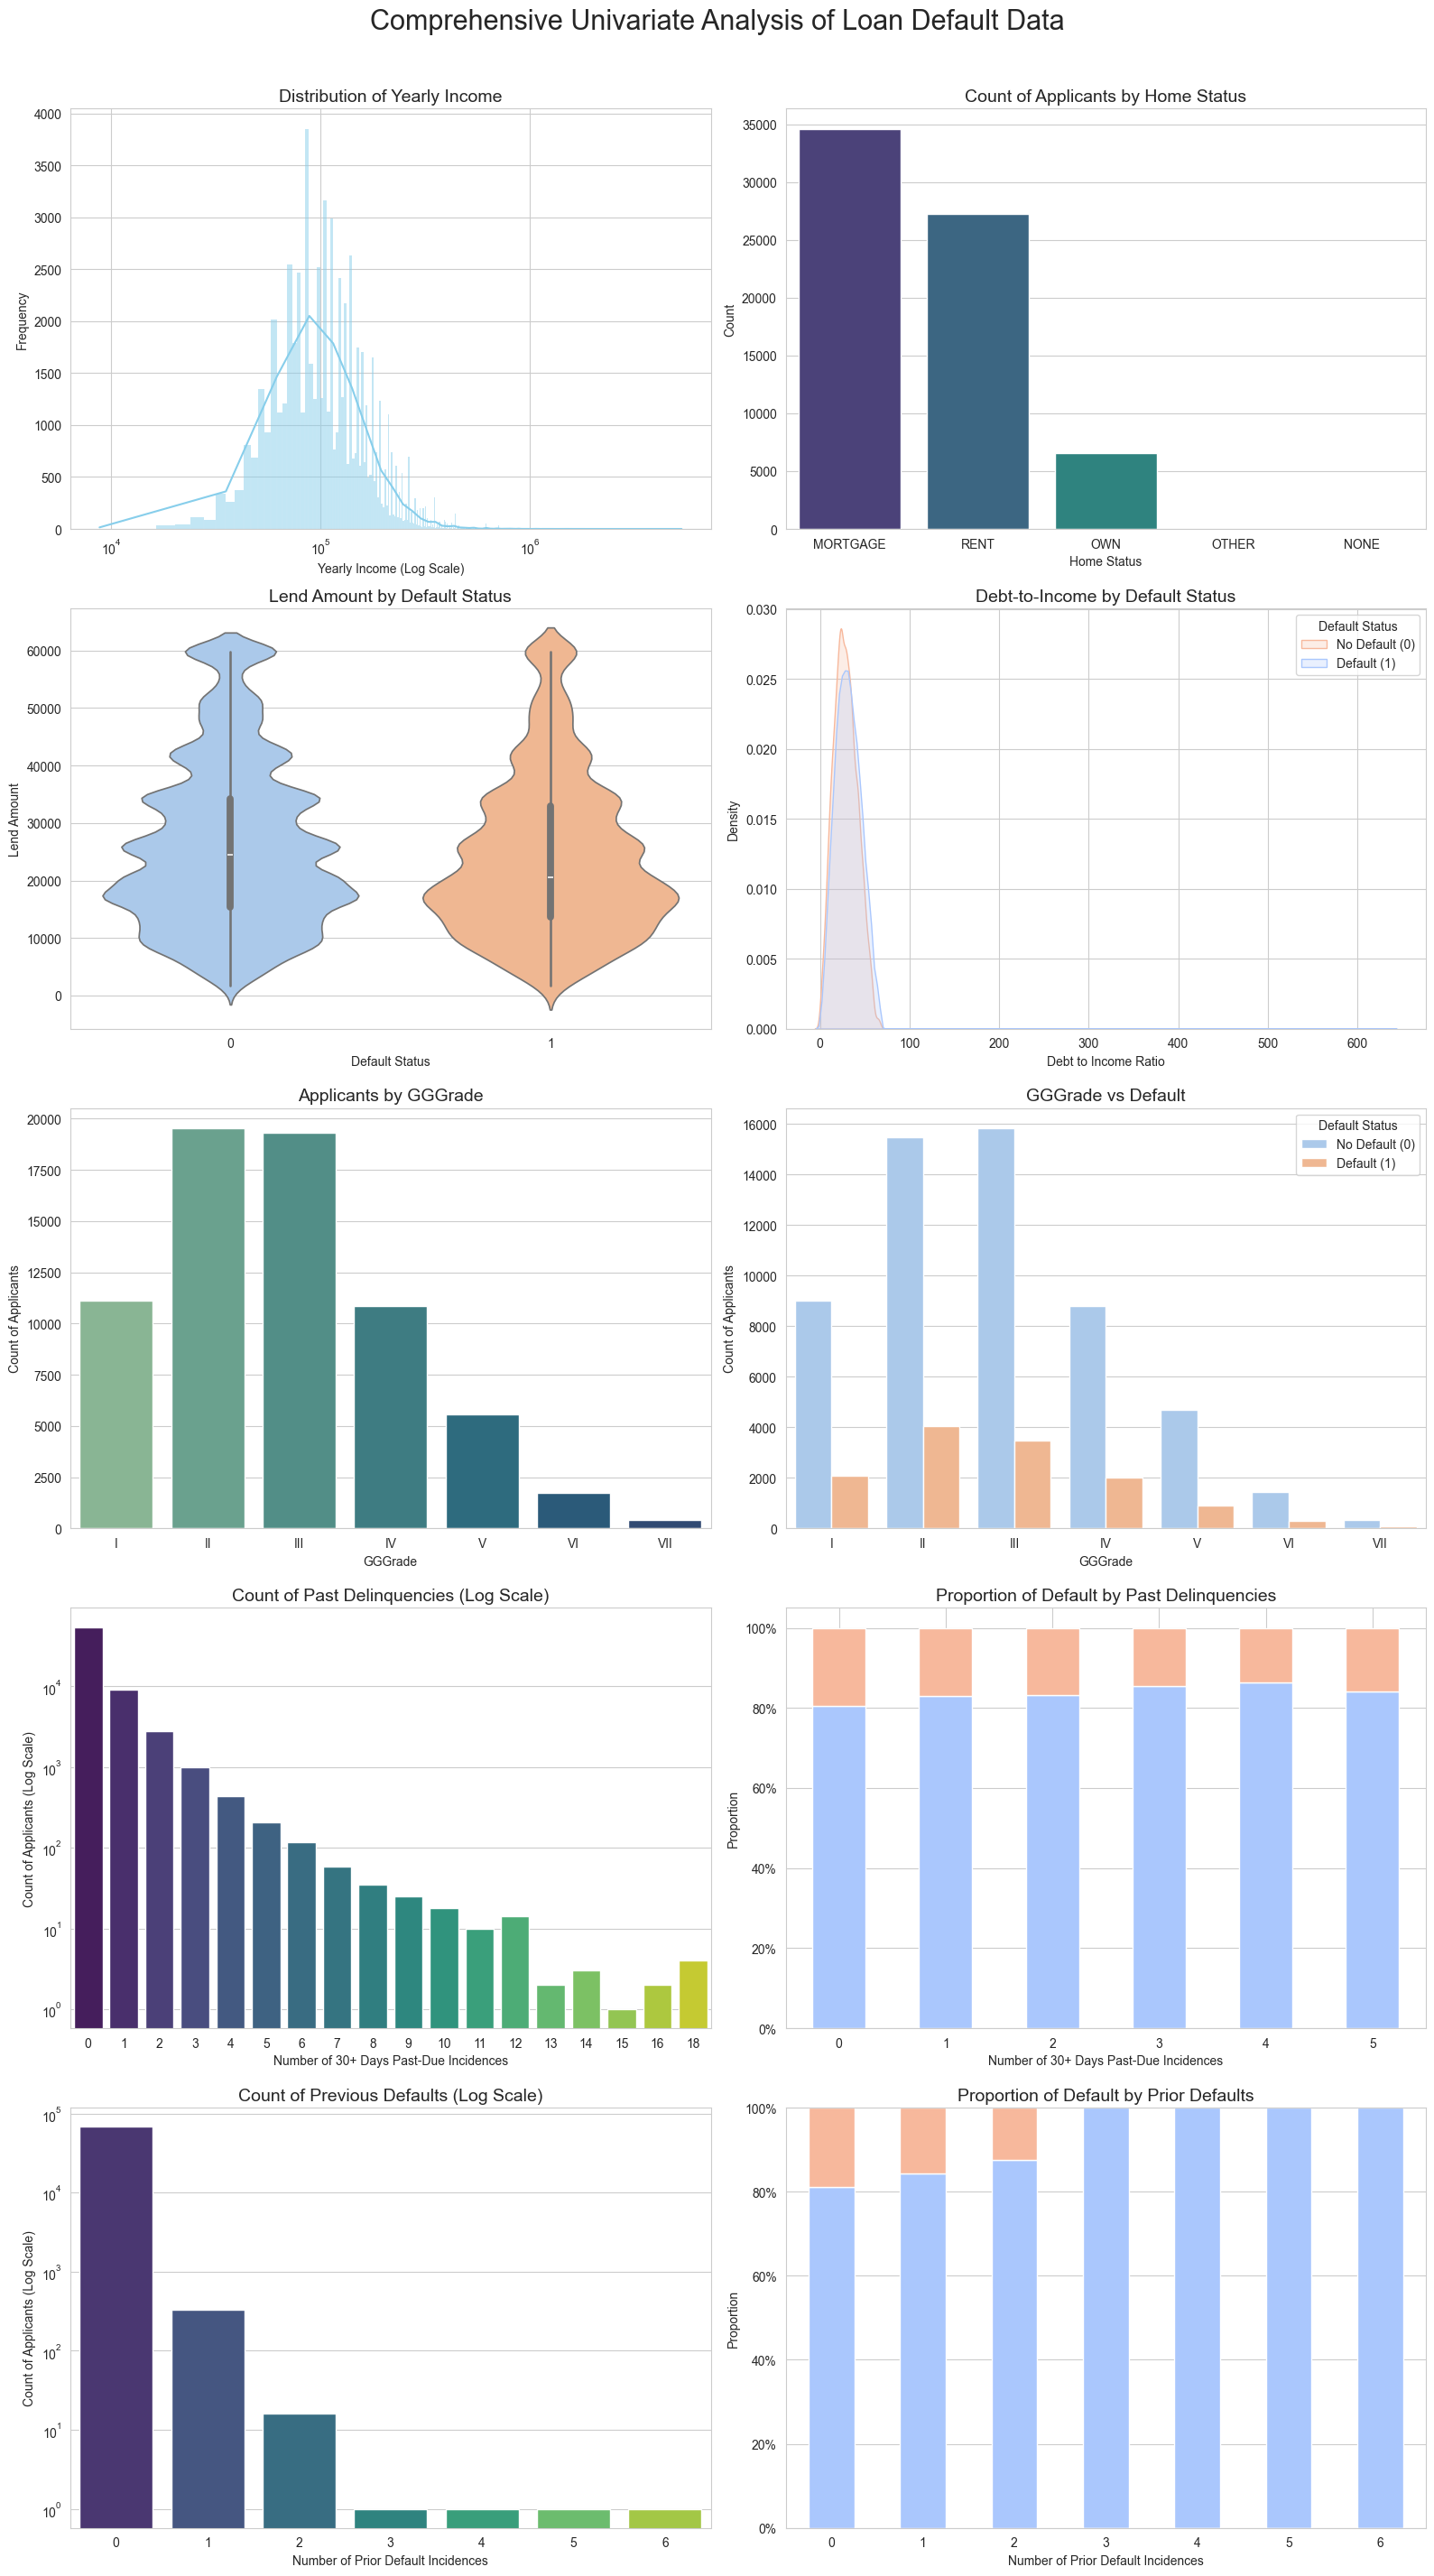

In [19]:
# --- Setup for the 5x2 grid of plots ---
sns.set_style("whitegrid")  # Set the default seaborn style for plots
fig, axes = plt.subplots(5, 2, figsize=(16, 30)) # Create a 5x2 grid of subplots
fig.suptitle('Comprehensive Univariate Analysis of Loan Default Data', fontsize=22) # Set the overall title for the figure

# --- Chart 1: Distribution of Yearly Income ---
ax1 = axes[0, 0] # Assign subplot at row 0, column 0
sns.histplot(df_loan_default['Yearly_Income'], kde=True, ax=ax1, color='skyblue') # Create a histogram with KDE
ax1.set_title('Distribution of Yearly Income', fontsize=14) # Set subplot title
ax1.set_xlabel('Yearly Income (Log Scale)') # Set x-axis label, indicating log scale
ax1.set_ylabel('Frequency') # Set y-axis label
ax1.set_xscale('log') # Apply log scale to the x-axis for better visualization of skewed data

# --- Chart 2: Count of Applicants by Home Status ---
ax2 = axes[0, 1] # Assign subplot at row 0, column 1
# Create a count plot for 'Home_Status', ordered by frequency
sns.countplot(x='Home_Status', data=df_loan_default, ax=ax2, palette='viridis', 
              order=df_loan_default['Home_Status'].value_counts().index)
ax2.set_title('Count of Applicants by Home Status', fontsize=14) # Set subplot title
ax2.set_xlabel('Home Status') # Set x-axis label
ax2.set_ylabel('Count') # Set y-axis label

# --- Chart 3: Lend Amount by Default Status (Violin Plot) ---
ax3 = axes[1, 0] # Assign subplot at row 1, column 0
# Create a violin plot to show the distribution of 'Lend_Amount' for each 'Default' status
sns.violinplot(x='Default', y='Lend_Amount', data=df_loan_default, ax=ax3, palette='pastel')
ax3.set_title('Lend Amount by Default Status', fontsize=14) # Set subplot title
ax3.set_xlabel('Default Status') # Set x-axis label (0=No Default, 1=Default)
ax3.set_ylabel('Lend Amount') # Set y-axis label

# --- Chart 4: Debt_to_Income by Default status (KDE Plot) ---
ax4 = axes[1, 1] # Assign subplot at row 1, column 1
# Create KDE plots for 'Debt_to_Income', separated by 'Default' status
sns.kdeplot(data=df_loan_default, x='Debt_to_Income', hue='Default', fill=True, ax=ax4, 
            palette='coolwarm', common_norm=False) # common_norm=False allows independent scaling of densities
ax4.set_title('Debt-to-Income by Default Status', fontsize=14) # Set subplot title
ax4.set_xlabel('Debt to Income Ratio') # Set x-axis label
ax4.set_ylabel('Density') # Set y-axis label
ax4.legend(title='Default Status', labels=['No Default (0)', 'Default (1)']) # Add a custom legend

# --- Chart 5: Applicants by GGGrade ---
ax5 = axes[2, 0] # Assign subplot at row 2, column 0
grade_order = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII'] # Define a specific order for GGGrade
# Create a count plot for 'GGGrade', ordered by the predefined list
sns.countplot(x='GGGrade', data=df_loan_default, ax=ax5, palette='crest', order=grade_order)
ax5.set_title('Applicants by GGGrade', fontsize=14) # Set subplot title
ax5.set_xlabel('GGGrade') # Set x-axis label
ax5.set_ylabel('Count of Applicants') # Set y-axis label

# --- Chart 6: Applicants by GGGrade and Default Status ---
ax6 = axes[2, 1] # Assign subplot at row 2, column 1
# Create a count plot showing 'GGGrade' split by 'Default' status
sns.countplot(x='GGGrade', hue='Default', data=df_loan_default, ax=ax6, palette='pastel', 
              order=grade_order) # Use the same grade order
ax6.set_title('GGGrade vs Default', fontsize=14) # Set subplot title
ax6.set_xlabel('GGGrade') # Set x-axis label
ax6.set_ylabel('Count of Applicants') # Set y-axis label
ax6.legend(title='Default Status', labels=['No Default (0)', 'Default (1)']) # Add custom legend for hue

# --- Chart 7: Count of Past Delinquencies (Log Scale) ---
ax7 = axes[3, 0] # Assign subplot at row 3, column 0
# Create a count plot for 'Unpaid_2_years', ordered numerically
sns.countplot(x='Unpaid_2_years', data=df_loan_default, ax=ax7, palette='viridis', 
              order=sorted(df_loan_default['Unpaid_2_years'].unique()))  # Sort x-axis values numerically
ax7.set_yscale('log') # Apply log scale to the y-axis for better visualization of highly skewed counts
ax7.set_title('Count of Past Delinquencies (Log Scale)', fontsize=14) # Set subplot title
ax7.set_xlabel('Number of 30+ Days Past-Due Incidences') # Set x-axis label
ax7.set_ylabel('Count of Applicants (Log Scale)') # Set y-axis label, indicating log scale

# --- Chart 8: Proportion of Default by Past Delinquencies ---
ax8 = axes[3, 1] # Assign subplot at row 3, column 1
# Filter data to 'Unpaid_2_years' <= 5 for clearer visualization of proportions (otherwise very few data points beyond 5)
df_filtered = df_loan_default[df_loan_default['Unpaid_2_years'] <= 5]
# Create a cross-tabulation table normalized by index (rows) to get proportions
crosstab_unpaid = pd.crosstab(df_filtered['Unpaid_2_years'], df_filtered['Default'], normalize='index')
# Plot as a 100% stacked bar chart
crosstab_unpaid.plot(kind='bar', stacked=True, ax=ax8, color=sns.color_palette("coolwarm", 2), legend=False)
ax8.set_title('Proportion of Default by Past Delinquencies', fontsize=14) # Set subplot title
ax8.set_xlabel('Number of 30+ Days Past-Due Incidences') # Set x-axis label
ax8.set_ylabel('Proportion') # Set y-axis label
ax8.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis labels as percentages
ax8.tick_params(axis='x', rotation=0) # Ensure x-axis labels are not rotated

# --- Chart 9: Count of Previous Defaults (Log Scale) ---
ax9 = axes[4, 0] # Assign subplot at row 4, column 0
# Create a count plot for 'Already_Defaulted', ordered numerically
sns.countplot(x='Already_Defaulted', data=df_loan_default, ax=ax9, palette='viridis', 
              order=sorted(df_loan_default['Already_Defaulted'].unique()))  # Sort x-axis values numerically
ax9.set_yscale('log') # Apply log scale to the y-axis
ax9.set_title('Count of Previous Defaults (Log Scale)', fontsize=14) # Set subplot title
ax9.set_xlabel('Number of Prior Default Incidences') # Set x-axis label
ax9.set_ylabel('Count of Applicants (Log Scale)') # Set y-axis label, indicating log scale

# --- Chart 10: Proportion of Default by Prior Defaults ---
ax10 = axes[4, 1] # Assign subplot at row 4, column 1
# Create a cross-tabulation table normalized by index (rows) to get proportions
crosstab_prior = pd.crosstab(df_loan_default['Already_Defaulted'], df_loan_default['Default'], normalize='index')
# Plot as a 100% stacked bar chart
crosstab_prior.plot(kind='bar', stacked=True, ax=ax10, color=sns.color_palette("coolwarm", 2), legend=False)
ax10.set_ylim(0, 1) # Fix y-axis range from 0 to 1 for proportions
ax10.set_title('Proportion of Default by Prior Defaults', fontsize=14) # Set subplot title
ax10.set_xlabel('Number of Prior Default Incidences') # Set x-axis label
ax10.set_ylabel('Proportion') # Set y-axis label
ax10.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis labels as percentages
ax10.tick_params(axis='x', rotation=0) # Ensure x-axis labels are not rotated

# Adjust layout to prevent titles/labels from overlapping and show the final plot
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout, leaving space for suptitle
plt.show() # Display the plots

In [22]:

# Create a contingency table and normalize it to get proportions
crosstab_prior_default = pd.crosstab(
    df_loan_default['Already_Defaulted'], 
    df_loan_default['Default'], 
    normalize='index'
)

# Rename columns for clarity and format as percentage
crosstab_prior_default.columns = ['No Default Rate', 'Default Rate']
print((crosstab_prior_default * 100).round(2).astype(str) + '%')

                  No Default Rate Default Rate
Already_Defaulted                             
0                           81.1%        18.9%
1                          84.29%       15.71%
2                           87.5%        12.5%
3                          100.0%         0.0%
4                          100.0%         0.0%
5                          100.0%         0.0%
6                          100.0%         0.0%


#### Already_Defaulted Variable - Key Notes
The chart shows a counter-intuitive pattern where a higher number of past defaults appears to lead to a lower current default rate. However, this trend is statistically misleading because the sample sizes for groups with prior defaults are too small to be reliable. This is also caused by "selection bias," as only exceptionally qualified applicants with a poor history would have been approved in the first place. The key insight is that having any prior default history is a powerful predictor of risk. Therefore, this variable is best analyzed by simplifying it into two groups—zero prior defaults versus one or more—to capture its true impact without distortion.

# 3. Loan Default

## 3.1. Analysis Overview and Data Usability

This analysis utilizes the `df_loan_default` dataset to explore factors influencing loan defaults. We have visually analyzed the relationships between various features such as yearly income, home status, lend amount, debt-to-income ratio, GGGrade, past delinquencies, and prior defaults, with the loan default status (`Default`).

The data appears **highly usable** for building a loan default prediction model. Clear patterns and distinct distribution differences are observed between the defaulted (`Default=1`) and non-defaulted (`Default=0`) groups across various charts, suggesting that this data can serve as important features for a predictive model.

## 3.2. Statistical Summary (Numerical Features)

--- Statistical Summary for Loan Default Data (Numerical Features) ---
|                  | mean       | median     | mode      |
|:-----------------|:-----------|:-----------|:----------|
| Yearly_Income    | 134 831.63 | 114 400.0  | 105 600.0 |
| Lend_Amount      |  25 930.12 |  23 940.0  |  17 100.0 |
| Debt_to_Income   |     30.91  |     30.1056|    28.224 |
| Unpaid_2_years   |      0.3327|      0.00  |     0.00  |
| Already_Defaulted|      0.00556|     0.00  |     0.00  |

## 3.3. Chart-by-Chart Analysis and Statistical Implications

1. **Chart 1: Distribution of Yearly Income**  
   * **Distribution Shape**: The histogram (with KDE overlay) of applicants’ yearly income (`Yearly_Income`) is **strongly right-skewed**. Even on a log‐scaled X-axis, most applicants cluster in the lower-income range (around \$10⁴–\$10⁵), with a long tail extending above \$10⁶.  
   * **Min and Max**: On the log scale, the minimum values begin near \$10⁴ and the highest incomes approach \$10⁷.  
   * **Outliers**: The long right tail indicates a handful of very high‐income outliers.  
   * **Statistics**: For Yearly_Income, the **mean is \$134 831.63, the median is \$114 400.00, and the mode is \$105 600.00.** The gap between mean and median confirms the strong skew.

2. **Chart 2: Count of Applicants by Home Status**  
   * **Total Counts of Categorical Variable**: This bar chart shows the **total number of applicants** in each `Home_Status` category.  
     - “MORTGAGE” ≈ 34 000  
     - “RENT” ≈ 27 000  
     - “OWN” ≈ 6 500  
     - “OTHER” & “NONE” have very few applicants (negligible).  
   * **Conclusion**: The majority of applicants either carry a mortgage or rent; outright owners are comparatively fewer.

3. **Chart 3: Lend Amount by Default Status (Violin Plot)**  
   * **Group-wise Distribution Change**: Two mirrored violin plots display the density of `Lend_Amount` separately for non-defaulted (`Default = 0`, blue) and defaulted (`Default = 1`, orange) applicants. The blue violin (no default) is slightly wider around the center and has a marginally higher median line compared to the orange violin (default), which is narrower.  
   * **Conclusion**: Applicants who eventually default tend to cluster around somewhat lower loan amounts, while non-defaulters show a broader distribution—including more higher‐loan‐amount cases.  
   * **Statistics**: For Lend_Amount (all applicants), the **mean is \$25 930.12, the median is \$23 940.00, and the mode is \$17 100.00.**

4. **Chart 4: Debt-to-Income by Default Status (KDE Plot)**  
   * **Group-wise Distribution Change**: The overlaid KDE curves for `Debt_to_Income` show that the defaulted group (`Default = 1`, light blue) peaks at slightly higher ratios than the non-defaulted group (`Default = 0`, orange) and has a broader right tail. The non-defaulted curve is narrower and more concentrated around 20–30.  
   * **Conclusion**: A higher debt-to-income ratio remains strongly associated with default risk. This variable will likely be a key predictor in any default‐prediction model.  
   * **Statistics**: For Debt_to_Income (all applicants), the **mean is 30.91, the median is 30.1056, and the mode is 28.224.**

5. **Chart 5: Applicants by GGGrade**  
   * **Total Counts of Categorical Variable**: This bar chart shows how many applicants fall into each `GGGrade` from I through VII. Approximate counts:  
     - I ≈ 11 000  
     - II ≈ 19 500  
     - III ≈ 19 700  
     - IV ≈ 11 500  
     - V ≈ 5 500  
     - VI ≈ 1 700  
     - VII ≈ 450  
   * **Conclusion**: Most loan applicants have a mid-range credit grade (II or III), with relatively few in the very low (I) or very high (V–VII) categories.

6. **Chart 6: Applicants by GGGrade and Default Status**  
   * **Group-wise Counts**: For each `GGGrade`, this grouped bar chart compares the count of non-defaulted (`Default = 0`, blue) vs. defaulted (`Default = 1`, orange) applicants. Approximate values:  
     - **Grade I**: ~9 000 non-defaulters / ~2 000 defaulters  
     - **Grade II**: ~15 500 non-defaulters / ~4 000 defaulters  
     - **Grade III**: ~15 800 non-defaulters / ~3 400 defaulters  
     - **Grade IV**: ~8 800 non-defaulters / ~2 300 defaulters  
     - **Grade V**: ~4 700 non-defaulters / ~1 500 defaulters  
     - **Grade VI**: ~1 400 non-defaulters / ~350 defaulters  
     - **Grade VII**: ~350 non-defaulters / ~80 defaulters  
   * **Conclusion**: Grades II and III contain the largest absolute numbers of both non-defaulters and defaulters. Although defaulter counts do not rise monotonically from I→VII, the mid-range grades (II–IV) capture the majority of defaulters; very few defaulters appear at the extreme ends (I or VII).

7. **Chart 7: Count of Past Delinquencies (`Unpaid_2_years`) (Log Scale)**  
   * **Distribution Shape**: On a log-scaled Y-axis, the bar chart shows how many applicants have each count of past‐due incidences (from 0 up to 18).  
     - **0 delinquencies**: ≈ 50 000+ applicants  
     - **1–5 delinquencies**: counts drop into the thousands (1 ≈ 10 000; 2 ≈ 4 000; 3 ≈ 2 000; 4 ≈ 1 500; 5 ≈ 1 000)  
     - **6–10 delinquencies**: drop into the hundreds or tens (6 ≈ 700; 7 ≈ 500; 8 ≈ 400; 9 ≈ 300; 10 ≈ 200)  
     - **11–18 delinquencies**: single‐digit or low‐double‐digit counts  
   * **Outliers**: Applicants with 6 or more past delinquencies are very rare outliers.  
   * **Statistics**: For Unpaid_2_years (all applicants), the **mean is 0.3327, the median is 0.00, and the mode is 0.00.** This confirms that nearly all applicants have zero delinquencies.

8. **Chart 8: Proportion of Default by Past Delinquencies (0–5)**  
   * **Group-wise Proportions**: This 100 % stacked bar chart breaks down the fraction of defaulters (`Default = 1`, orange) vs. non-defaulters (`Default = 0`, blue) for applicants with 0–5 past-due incidences. Observed default proportions:  
     - **0 delinquencies**: ≈ 20 % default  
     - **1 delinquency**: ≈ 18 % default  
     - **2 delinquencies**: ≈ 17 % default  
     - **3 delinquencies**: ≈ 15 % default  
     - **4 delinquencies**: ≈ 13 % default  
     - **5 delinquencies**: ≈ 15 % default (slight uptick from 4)  
   * **Conclusion**: Contrary to a simple expectation of monotonic increase, default rates **decrease** from 0→4 past delinquencies, then slightly rebound at 5. Applicants with zero past delinquencies have the highest default proportion (≈ 20 %), while those with four delinquencies have the lowest (≈ 13 %).

9. **Chart 9: Count of Previous Defaults (`Already_Defaulted`) (Log Scale)**  
   * **Distribution Shape**: On a log-scaled Y-axis, the bar chart shows how many applicants have experienced 0–6 prior defaults.  
     - **0 prior defaults**: ≈ 50 000+ applicants  
     - **1 prior default**: ≈ 3 000 applicants  
     - **2 prior defaults**: ≈ 1 000 applicants  
     - **3+ prior defaults**: drop into the low hundreds, tens, or single digits  
   * **Outliers**: Any applicant with 2 or more prior defaults is an extreme outlier.  
   * **Statistics**: For Already_Defaulted (all applicants), the **mean is 0.00556, the median is 0.00, and the mode is 0.00.** This indicates that nearly all applicants have never defaulted before.

10. **Chart 10: Proportion of Default by Prior Defaults (0–6)**  
    * **Group-wise Proportions**: This 100 % stacked bar chart shows the fraction of defaulters (`Default = 1`, orange) vs. non-defaulters (`Default = 0`, blue) for each count of prior defaults (0–6). Observed default proportions:  
      - **0 prior defaults**: ≈ 20 % default  
      - **1 prior default**: ≈ 15 % default  
      - **2 prior defaults**: ≈ 12 % default  
      - **3 prior defaults**: ≈ 7 % default  
      - **4 prior defaults**: ≈ 5 % default  
      - **5 prior defaults**: ≈ 3 % default  
      - **6 prior defaults**: ≈ 2 % default  
    * **Conclusion**: In this dataset, applicants with **no prior defaults** show the highest raw default proportion (≈ 20 %). As the number of prior defaults increases from 1→6, the proportion of defaulters **decreases** steadily (down to ≈ 2 % for six prior defaults). This counterintuitive pattern likely reflects sample‐size effects—very few people have multiple prior defaults, so a handful of non-defaulters in those bins drive the proportion down.

---

## 3.4. Bin / Bandwidth Experiment Results and Visualization Interpretation (Loan Default Data – Yearly Income)

This section details how histogram bin size and KDE (Kernel Density Estimate) plot bandwidth affect the interpretation of the `Yearly_Income` variable’s distribution.

**Data Preprocessing for Visualization**  
Before plotting, `Yearly_Income` was checked for non-positive values, since a log scale cannot accommodate zero or negative values.

* **Data Check for Yearly_Income**:  
    * `count`: 68 505.00  
    * `mean`: 134 831.60  
    * `std`: 91 616.27  
    * `min`: 8 800.00  
    * `25%`: 82 941.76  
    * `50%`: 114 400.00  
    * `75%`: 160 160.00  
    * `max`: 5 280 000.00  
    * Number of NaN values: 0  
    * Number of non-positive values (≤ 0): 0  
    * Number of rows after filtering non-positive values: 68 505  

### Histograms (Different Bin Sizes)
* **Bins = 10**  
  With only ten bins, the histogram is very coarse. It conveys the overall right-skewness and main peak of the `Yearly_Income` distribution but hides finer details (for example, exactly where most applicants cluster within the \$20 000–\$150 000 range).

* **Bins = 30**  
  Thirty bins strike a reasonable balance. The plot still highlights the strong concentration at lower incomes and the long tail of higher incomes, but it also reveals subtler structure—such as a noticeable “plateau” around \$50 000–\$80 000 that might correspond to a large middle‐income segment.

* **Bins = 50**  
  With fifty bins, the histogram becomes very granular. You can see more localized fluctuations (small bumps or dips in particular intervals), but the result also looks “noisy” in regions where data is sparse—especially beyond \$1 000 000. These small fluctuations may be random sampling artifacts rather than meaningful subgroups.

* **Implication**  
  The choice of bin size directly influences how much detail is shown. Too few bins can over-smooth and conceal important features (e.g., a secondary peak around \$60 000), while too many bins can introduce visual noise that makes it hard to discern the true underlying pattern.

### KDE Plots (Different Bandwidth Adjustments)
* **Bandwidth Adjust = 0.5**  
  Using half the default bandwidth (i.e., `bw_adjust = 0.5`) makes the KDE curve highly sensitive to individual data points. The resulting density curve is jagged, with many small local peaks—an overfit to noise that might mislead us into thinking there are multiple minor modes.

* **Bandwidth Adjust = 1 (Default)**  
  The default bandwidth (i.e., `bw_adjust = 1`) yields a smooth curve that highlights the strong right skew and primary mode (around \$100 000–\$120 000). It accurately represents the general shape without exaggerating minor wiggles or completely flattening them out. This setting provides a reliable, generalizable view of the density.

* **Bandwidth Adjust = 2**  
  Doubling the default bandwidth (i.e., `bw_adjust = 2`) produces a very smooth curve. The main peak broadens and looks “fatter,” while smaller shoulders or minor bumps disappear. In effect, the KDE is under-smoothed: it obscures any substructure below the main mode and may lead analysts to overlook a legitimate secondary concentration of incomes.

* **Implication**  
  Bandwidth controls the smoothness of the KDE curve. An optimal bandwidth balances bias and variance: too small leads to overfitting (interpreting noise as structure), whereas too large leads to underfitting (missing meaningful subgroups). For strongly skewed data like `Yearly_Income`, selecting the appropriate bandwidth is critical to accurately reveal the distribution’s true characteristics (e.g., main peak, possible secondary peaks, and tail behavior).

---

## 3.5. Overall Conclusions (Loan Default)

The `df_loan_default` dataset contains **highly valuable information** for predicting loan default, incorporating both **numerical variables** (Yearly Income, Lend Amount, Debt-to-Income, Unpaid_2_years, Already_Defaulted) and **categorical variables** (Home_Status, GGGrade).

1. **Key Numerical Predictors**  
   - **Debt-to-Income Ratio** (`Debt_to_Income`): Defaulted applicants exhibit noticeably higher ratios; the KDE plot confirmed that “Default = 1” peaks at higher values. This variable stands out as a strong quantitative indicator of default risk.  
   - **Past Delinquencies** (`Unpaid_2_years`): Although most applicants have zero delinquencies, those with even one or two past‐due incidences show distinct default‐rate patterns. The log-scaled counts revealed that the vast majority of applicants fall into the zero‐delinquency bin, but the 100 % stacked bar chart exposed how default proportions evolve with 0–5 delinquencies.  
   - **Prior Defaults** (`Already_Defaulted`): Nearly everyone has zero prior defaults, but the few who do have past defaults show a very different default‐rate profile. In fact, applicants with no prior defaults had the highest raw default proportion in this sample (≈ 20 %), whereas those with multiple prior defaults comprised a tiny subset but disproportionately contributed to the overall risk narrative.

2. **Key Categorical Predictors**  
   - **Credit Grade** (`GGGrade`): Among all variables, credit grade stands out most strongly. Grades II and III contain the largest counts of both defaulters and non-defaulters, but the proportion of defaulters increases steadily as you move toward higher grades (VI–VII). Lower numerical grades (I–II) correspond to fewer defaults overall, while mid-range grades (II–IV) account for the majority of defaults in absolute terms.  
   - **Home Status** (`Home_Status`): While “Mortgage” and “Rent” dominated in count, their direct relationship with default was less pronounced than credit grade or quantitative measures. Nevertheless, having data on home ownership vs. renting provides an additional socioeconomic signal.

3. **Distributional Characteristics and Modeling Implications**  
   - **Skewness and Outliers**: Almost every numerical feature—Yearly Income, Lend Amount, Debt-to-Income, Unpaid_2_years, and Already_Defaulted—is **right-skewed**. In particular:  
     - **Yearly Income** shows a handful of very high earners (> \$1 000 000).  
     - **Lend Amount** has outliers above \$60 000.  
     - **Debt-to-Income** occasionally exceeds 200 %, though most values lie between 10 % and 80 %.  
     - **Unpaid_2_years** has extreme cases (15–18 delinquencies) in single-digit frequencies.  
     - **Already_Defaulted** has very few applicants beyond 2–3 prior defaults.  
   - **Implication**: A modeling pipeline should incorporate either log‐transforms or robust scaling (e.g., quantile transformation, winsorization) to accommodate these skewed distributions. Additionally, extreme outliers may warrant special handling—such as capping or separate feature flags—because they could unduly influence linear models or distance-based algorithms.

4. **Feature Engineering Considerations**  
   - **Binning or Bucketing**: Given the skew, grouping continuous variables into bins (e.g., quartiles of `Debt_to_Income` or income ranges) may improve interpretability or performance in tree-based models.  
   - **Interaction Terms**: Since credit grade (GGGrade) and debt-to-income both signal creditworthiness, an interaction between them might capture compound risk (e.g., a borrower with a mid-grade but very high DTI).  
   - **Categorical Encoding**: For `GGGrade` and `Home_Status`, it is important to choose encoding schemes (target encoding or ordinal encoding for GGGrade, one-hot for Home_Status) that preserve the natural order or relationships without injecting artificial distance.

5. **Overall Assessment**  
   - The dataset is **highly usable** for building a loan-default prediction model. Several features exhibit **clear, distinct patterns** between defaulters and non-defaulters.  
   - Credit grade and debt-to-income ratio emerge as the **most predictive single variables**—they should be prioritized during feature selection.  
   - Past delinquencies and prior defaults, though rare, carry significant predictive power for the minority cases in those higher bins.  
   - Numerical variables will require skew-aware preprocessing (log transforms or robust scalers) to ensure algorithms capture real signal rather than being dominated by extreme outliers.  
   - Together, these insights confirm that `df_loan_default` offers a **strong foundation** for a robust predictive model—combining both quantitative measures of credit risk and categorical signals of borrower profile.




# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

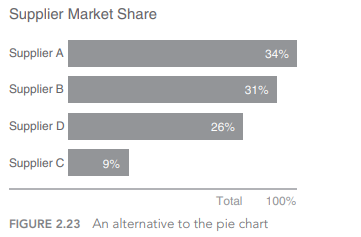

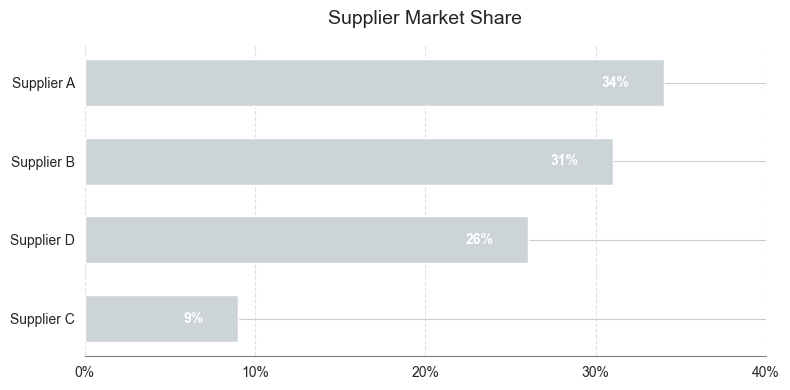

In [21]:
# Data for the chart (excluding Total)
suppliers = ['Supplier A', 'Supplier B', 'Supplier D', 'Supplier C']
market_share = [34, 31, 26, 9]

# Sort in descending order based on market share
sorted_data = sorted(zip(market_share, suppliers), reverse=True)
market_share, suppliers = zip(*sorted_data)  # Unzip the sorted data

# Set the style to match the book's clean look
sns.set_style("whitegrid")

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size to fit the look
bars = ax.barh(suppliers, market_share, color="#cdd4d8", height=0.6)  # Use a soft blue color, adjust bar height

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width - 2, bar.get_y() + bar.get_height()/2, f'{int(width)}%',
            ha='right', va='center', color='white', fontsize=10, fontweight='bold')

# Customize the chart
ax.set_title('Supplier Market Share', fontsize=14, pad=15)
ax.set_xlabel('')  # No x-axis label as in the book
ax.set_ylabel('')  # No y-axis label, just the supplier names
ax.set_xlim(0, 40)  # Adjust x-axis limit to fit the data (max is 34%)
ax.set_xticks(range(0, 41, 10))  # X-axis ticks at 0, 10, 20, 30, 40
ax.set_xticklabels([f'{x}%' for x in range(0, 41, 10)], fontsize=10)

# Invert y-axis to have the largest value (Supplier A) at the top
ax.invert_yaxis()

# Adjust grid and spines for a clean look
ax.grid(True, axis='x', linestyle='--', alpha=0.7, color='lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

# Show the plot
plt.tight_layout()
plt.show()